<font size=6 bg="blue"><center>**Analysis on route information failure in
IP core networks by NFV-based test environment**</center></font>

<img src='../images/5g.webp'/>

<font size=6>**Content:**</font>
* [Business Understanding](#business-understanding)
* [Data Visualization And Understanding](#data-understanding)
* [Data Preparation](#data-preparation)
* [Modeling](#modeling)
* [Evaluation](#evaluation)
* [Deployment](#data-deployment)

# <font size=6 id='business-understanding'>**BUSINESS UNDERSTANDING**</font>

<p>Today, operators are handling high complexity traffic as customer demand has become increasingly demanding. Companies, large facilities, and users who are still very reliant. on the internet for their needs must be able to send and receive information without any problem. Operators must therefore ensure the transmission of information, its security, and the integrity of that information in order to satisfy users.
4G/5G architectures, which are purely packet switching, use the IP protocol, which is a best-effort protocol, and have a recurring problem of packet/information loss. We will perform predictive maintenance to predict routing errors and causes at the Physical, Virtual, and Network levels.</p>

# <font size=6 id='data-understanding'>**DATA** **VISUALIZATION** **AND** **UNDERSTANDING**</font>

<a href="https://docs.openstack.org/ceilometer/queens/admin/telemetry-measurements.html">Referencees</a>

**Features important**

<p style="font-family: Times New Roman; font-size:16px;"><ul><li>'if-name': network interface name</li>
<li>'vrf': Virtual Routing and Forwarding, allows to create separate logical routing domains in the same physical router</li>
<li>'ipv4-address': IP version 4 address associated with the network interface</li>
    <li>'hw-addr': physical (MAC) address of the network interface</li>
    <li>'in-bytes': number of bytes received by the interface</li>
    <li>'in-errors': number of errors while receiving data</li>
    <li>'out-bytes': number of bytes sent by the interface</li>
    <li>'out-errors': number of errors while sending data</li>
    <li>'speed': maximum interface speed in bits per second</li>
    <li>'duplex': duplex mode of the interface (full or half)</li>
    <li>'media-type': media type of the interface (e.g. copper, fiber optic, etc.)</li>
    <li>'bandwidth': interface bandwidth in kilobits per second</li>
    <li>'delay': interface latency in microseconds</li>
    <li>'load': interface load in percentage</li>
    <li>'rx-power': receive power in milliwatts</li>
    <li>'tx-power': transmit power in milliwatts</li>
    <li>'rx-signal': receive signal level in dBm</li>
    <li>'tx-signal': transmit signal level in dBm</li>
    <li>'rx-noise': receive noise level in dBm</li>
    <li>'tx-noise': transmit noise level in dBm</li>
    <li>'rx-crc-errors': number of cyclic redundancy check errors while receiving data</li>
    <li>'tx-crc-errors': number of cyclic redundancy check errors when sending data</li>
    <li>'prec-val': Quality of Service (QoS) precedence value for packets</li>
    <li>'ip_version': IP protocol version (4 or 6)</li>
    <li>'out-discarded-pkts': number of packets discarded by the interface when sending data</li>
    <li>'vcpus_used': number of vCPUs used on a virtual machine</li>
    <li>'memory-resident': amount of resident memory used by a process</li>
    <li>'hardware-disk-write-bytes': number of bytes written to hard disk</li>
    <li>'disk-usage': hard disk usage in percentage</li>
    <li>'hardware-disk-read-bytes': number of bytes read from hard disk</li>
    <li>'dei-imp-value': importance value for determining traffic priority in Ethernet networks<li>
    <li>'bandwidth-exceed-drops': number of packets dropped by the bandwidth limit feature</li>
    <li>'marked-pkts': number of packets marked with a certain QoS precedence value
    'total-entries': total number of entries in a BGP routing table.</li></ul></p>

**Metrics**
<p>The following metrics are associated with INTGW network devices:
<ol>
<li>cpu: this metric gives the total processor load of the INTGW device. It is usually expressed as a percentage and indicates the amount of CPU time used to process running tasks.</li>
<li>cpu-delta: This metric measures CPU utilization in a specific time interval and provides an indication of how CPU load has changed over time. It is typically used to monitor CPU usage spikes or to detect anomalies.</li>
<li>cpu-util: This metric measures CPU utilization as a percentage, taking into account vCPUs and physical CPU cores. It provides a more accurate indication of CPU usage than the cpu metric alone.</li>
<li>vcpu: This metric measures the virtual processing capacity of the INTGW device. It indicates the number of virtual cores allocated to the device and provides an indication of the overall processing capacity of the device.</li></ol></p>

**Flavor**
<p>In a network, the "flavor" index can designate the hardware configuration of a device or a virtualization instance. It may include information such as number of processor cores, amount of available RAM, storage capacity, processor speed, etc. In other words, the "flavor" index makes it possible to define the characteristics of the computing environment of a piece of equipment or a virtualization instance.</p>

**Importing Librairies and datasets**

In [1]:
#Import the principal librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import seaborn as sns
import os
import tensorflow as tf
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
#from google.colab import drive
import datetime
from itertools import count
import re
import plotly.offline as py
import plotly.graph_objs as go
from plotly.figure_factory import create_table
import plotly.express as px
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.feature_selection import SelectFromModel
from keras.callbacks import EarlyStopping
from sklearn. feature_selection import SelectFromModel
from sklearn. feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from ydata_profiling import ProfileReport
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import classification_report
from sklearn.utils import resample
from scipy.stats import skew, norm
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import TransformerMixin
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from statsmodels.tsa.stattools import adfuller
from keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import warnings
from xgboost import XGBClassifier
import pickle

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#Import all datasets
data_network = pd.read_csv('Data/csv/networkdataset.csv')
data_networkc = data_network.copy()
data_physical = pd.read_csv('Data/csv/Physical_data.csv')
data_physicalc = data_physical.copy()
data_virtual = pd.read_csv('Data/csv/Virtual_data.csv')
print("data_network has a shape = {} \ndata_physical has a shape = {} \ndata_virtual has a shape = {}".format(data_network.shape, data_physical.shape, data_virtual.shape))

data_network has a shape = (9670, 273) 
data_physical has a shape = (9670, 146) 
data_virtual has a shape = (9670, 587)


<p>We have already done analyzes and operations on the 03 datasets individually. After finding a relationship between the 03 physical, network and virtual datasets we will combine them into one.</p>

In [4]:
data_networkc=data_networkc.drop(['Unnamed: 0','type','type_code'], axis=1)
data_physicalc=data_physicalc.drop(['Unnamed: 0','/time','type','type_code'], axis=1)

In [5]:
#Concatenation
data_piwin = pd.concat([data_networkc, data_physicalc, data_virtual], axis=1, join='outer')
print("The new dataset piwin has a shape= {}".format(data_piwin.shape))

The new dataset piwin has a shape= (9670, 999)


In [6]:
#Save the dataset
#data_piwin.to_csv(r'/Users/armandbryan/Documents/4WIN/2nd semester/PIWIN/Dataset-Final/Data_pi.csv')

In [7]:
#Copy the data in another variable
df_pi = data_piwin.copy()
df_pi.head(3)

,/devices/modules/openconfig-interfaces/interfaces/interface/state/ifindex,/devices/modules/openconfig-interfaces/interfaces/interface/state/last-change,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-octets,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-unicast-pkts,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-broadcast-pkts,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-multicast-pkts,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-discards,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-errors,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-unknown-protos,/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-fcs-errors,...,/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,/time,type,type_code
0,1,1580105229000389000,17493436676,232900221,0,0,0,0,0,0,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,1,1580105229000408000,17493581912,232902425,0,0,0,0,0,0,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,1,1580105229000411000,17493719573,232904581,0,0,0,0,0,0,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1593395700,ixnetwork-traffic-start,0


In [8]:
#redundancy
df_pi=df_pi.drop("Unnamed: 0", axis=1)

In [9]:
#Let's us do some description to see relation with features
df_pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9670 entries, 0 to 9669
Columns: 998 entries, /devices/modules/openconfig-interfaces/interfaces/interface/state/ifindex to type_code
dtypes: float64(662), int64(335), object(1)
memory usage: 73.6+ MB


In [10]:
df_pi.columns

Index(['/devices/modules/openconfig-interfaces/interfaces/interface/state/ifindex',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/last-change',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-octets',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-unicast-pkts',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-broadcast-pkts',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-multicast-pkts',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-discards',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-errors',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-unknown-protos',
       '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-fcs-errors',
       ...
       '/ports#link-t

In [11]:
#Redundaces
def redundances(df):
    list_columns = df.columns
    for i in range(len(list_columns)):
        for j in range(i+1, len(list_columns)):
            if list_columns[i] == list_columns[j]:
                print("redundances columns: {} and index {}".format(list_columns[i], j))

In [12]:
redundances(df_pi)

<AxesSubplot: >

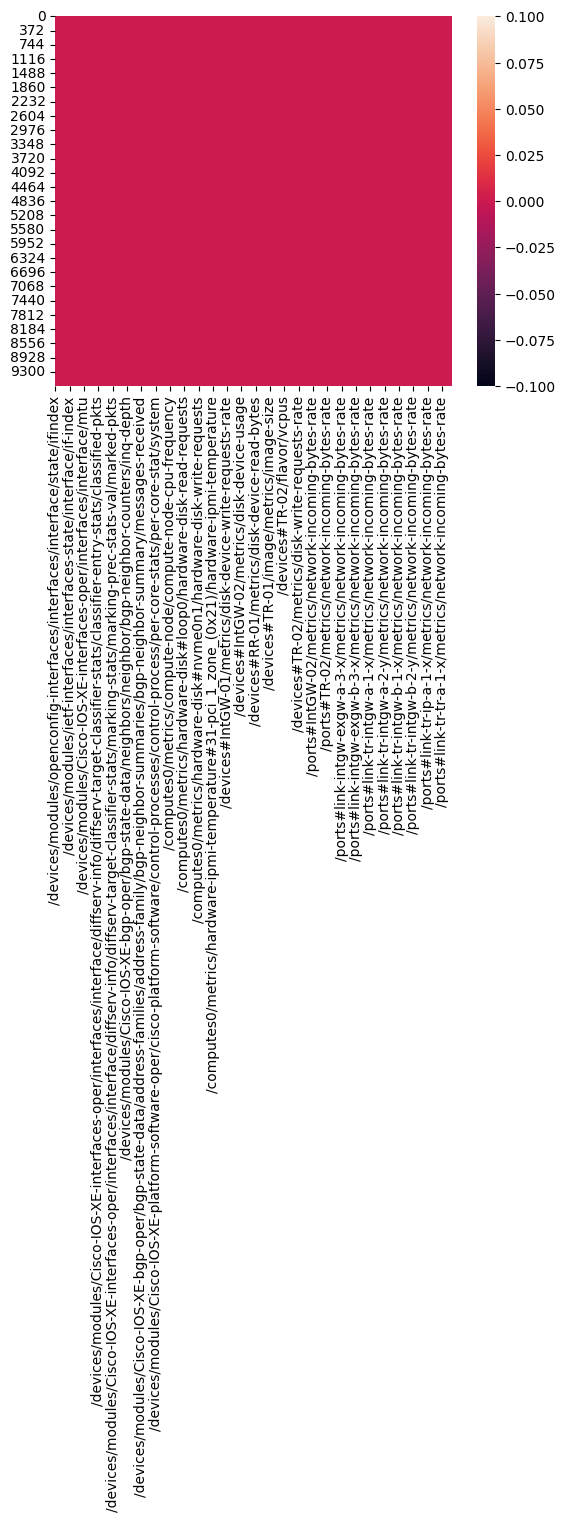

In [13]:
sns.heatmap(df_pi.isnull())

<p style="font-family: Times New Roman; font-size:16px;">We don't have missing values</p>

In [14]:
df_pi.describe().T

,count,mean,std,min,25%,50%,75%,max
/devices/modules/openconfig-interfaces/interfaces/interface/state/ifindex,9670.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
/devices/modules/openconfig-interfaces/interfaces/interface/state/last-change,9670.0,1.580110e+18,9.915624e+13,1.580105e+18,1.580105e+18,1.580105e+18,1.580105e+18,1.582020e+18
/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-octets,9670.0,1.815532e+10,4.119705e+08,1.486267e+10,1.782580e+10,1.816079e+10,1.849698e+10,1.883091e+10
/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-unicast-pkts,9670.0,2.432329e+08,6.053213e+06,2.183172e+08,2.380509e+08,2.432470e+08,2.484629e+08,2.536386e+08
/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-broadcast-pkts,9670.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...
/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,9670.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,9670.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,9670.0,2.029646e-01,5.373153e+00,0.000000e+00,1.000684e-01,1.163517e-01,1.170827e-01,5.019559e+02
/time,9670.0,1.593686e+09,1.679281e+05,1.593396e+09,1.593541e+09,1.593686e+09,1.593832e+09,1.593977e+09


<AxesSubplot: >

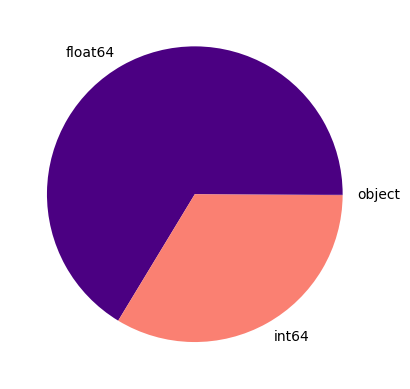

In [15]:
df_pi.dtypes.value_counts().plot.pie(colors = ['indigo','salmon'])

It's not possible to print card correlation because we've many variables.
Let's us do statistical understanding and visualisation now.

In [16]:
def identify_distribution(data, gaussian_thresh=0.05, right_skew_thresh=0.5, left_skew_thresh=-0.5):
    """
    Identify features with a Gaussian, right-skewed or left-skewed distribution.
    :param data: pandas dataframe containing the features
    :param gaussian_thresh: threshold for considering a feature Gaussian
    :param right_skew_thresh: threshold for considering a feature right-skewed
    :param left_skew_thresh: threshold for considering a feature left-skewed
    :return: lists of feature names for Gaussian, right-skewed and left-skewed distributions
    """
    gaussian = []
    right_skew = []
    left_skew = []
    for col in data.columns:
        if abs(skew(data[col].dropna())) < gaussian_thresh:
            gaussian.append(col)
        elif skew(data[col].dropna()) >= right_skew_thresh:
            right_skew.append(col)
        elif skew(data[col].dropna()) <= left_skew_thresh:
            left_skew.append(col)
    return gaussian, right_skew, left_skew


In [17]:
df_pi_without_type = df_pi.drop('type', axis=1)

In [18]:
gaussian_features, right_skew_features, left_skew_features = identify_distribution(df_pi_without_type)

In [19]:
print("We have {} gaussian features, {} right skew features and {} left skew features".format(len(gaussian_features), len(right_skew_features), len(left_skew_features)))

We have 188 gaussian features, 132 right skew features and 134 left skew features


<p>Interesting information, we have roughly determined the statistical distribution of our data. There is an error displayed. It warns us that the data is too large and the result may be biased. We must therefore take this information with great tact. Nevertheless, it gives us a glimpse.</p>
<div style="overflow: auto;">
    <img src="Plot/1200px-Gaussian_Filter.svg.png" alt="Gaussian Filter" style="float: left; width: 50%; height: auto;">
    <img src="Plot/body_skewed_right_left.png" alt="Skewed Distribution" style="float: right; width: 60%; height: auto;">
</div>
<p>Now we will observe the different correlation strengths of our variables with the target. We will analyze linear and nonlinear force.</p>

**Linear Strength**

In [20]:
#Linear Strength
correlations = df_pi_without_type.corrwith(df_pi_without_type['type_code'])

#Sorted
sorted_correlations = correlations.abs().sort_values(ascending=False)

#Extract features 
strongly_correlated_features_l = sorted_correlations[sorted_correlations >= 0.4].index.tolist()

#Print the size of features extracted
print("We extracted {} and they are: \n{}".format(len(strongly_correlated_features_l)-1, strongly_correlated_features_l))

We extracted 3 and they are: 
['type_code', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port']


In [21]:
#Path of folder to save 
direction = os.getcwd()
print("This is the path of the work {}".format(direction))

This is the path of the work /Users/armandbryan/Documents/4WIN/2nd semester/PIWIN/Dataset-Final


In [22]:
df_subset = df_pi[['type_code', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/updates', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/total-prefixes', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives']].copy()

#Rename features 
new_column_names = {
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw': 'sent_explicit_withdraw',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port': 'foreign_port',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port': 'local_port',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw': 'sent_implicit_withdraw',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/updates': 'sent_updates',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent': 'messages_sent',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/total-prefixes': 'sent_total_prefixes',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received': 'messages_received',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives': 'sent_keepalives',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives': 'received_keepalives'
}

df_subset = df_subset.rename(columns=new_column_names)

In [23]:
#Create folder
if not os.path.exists('figures'):
    os.mkdir('figures')

    
#Create Charts
#for col in df_subset.columns[1:]:
#    fig = px.histogram(df_subset, x=col, color='type_code')
#    fig.write_image(f'{direction}/figures/{col}_histogram.png')
#    fig.show()

<p>/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw: This feature represents the number of explicit withdraw messages sent by the BGP router to a particular neighbor (neighbor). An explicit withdraw message is used to remove a route from the neighbor's BGP routing table.</p>
<p>/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port: This feature represents the foreign port used to establish the BGP connection with a particular neighbor .</p>
<p>/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port: This feature represents the local port used to establish the BGP connection with a particular neighbor .</p>

In [24]:
gaussian_subset, right_skew_subset, left_skew_subset = identify_distribution(df_subset)

In [25]:
print("We have {} gaussian features, {} right skew features and {} left skew features".format(len(gaussian_subset), len(right_skew_subset), len(left_skew_subset)))

We have 0 gaussian features, 5 right skew features and 0 left skew features


In [26]:
#Print BoxPlot
def outliers_boxplot(data, y, color):
    
    """
    The function is helpful to do statiscal operation, print boxplot, and see numbers/rate of boxplot
    """
    
    #Statistical Summaries
    print("Statiscal Operation of features {}:\n ".format(y))
    min_y = np.min(data[y]) 
    max_y = np.max(data[y])
    q1 = data[y].quantile(0.25)
    mean_y = np.mean(data[y])
    median_y = np.median(data[y])
    q3 = data[y].quantile(0.75)
    iqr = q3 - q1
    print("\n Min = {} \n Max = {} \n 1st Quantile = {} \n Mean = {} \n Median = {} \n 3rd Quantile = {} \n IQR = {}".format(min_y, max_y, q1, mean_y, median_y, q3, iqr))
    
    #Detect outliers
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = data[(data[y] < lower_bound) | (data[y] > upper_bound)]
    outlier_rate = len(outliers) / len(data[y])
    print("\n Rate outliers: {:.2%}".format(outlier_rate))
    
    #Figure
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data, x=y, color = color)
    plt.show() 

Statiscal Operation of features sent_explicit_withdraw:
 

 Min = 0 
 Max = 7831 
 1st Quantile = 0.0 
 Mean = 415.182006204757 
 Median = 8.0 
 3rd Quantile = 8.0 
 IQR = 8.0

 Rate outliers: 14.21%


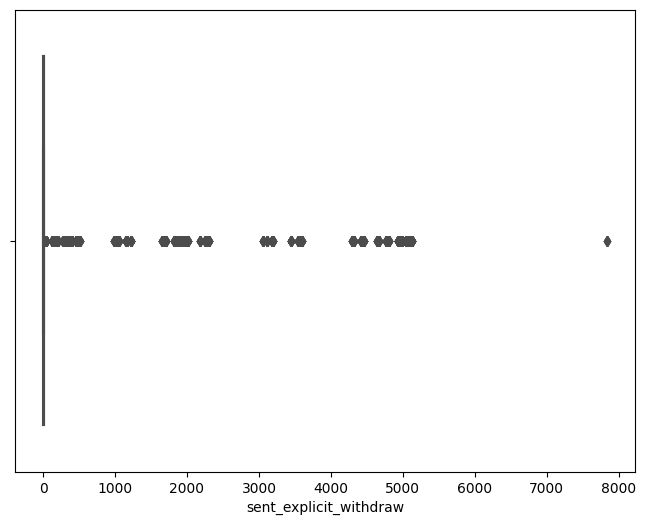

In [27]:
outliers_boxplot(df_subset, "sent_explicit_withdraw", "red")

Statiscal Operation of features foreign_port:
 

 Min = 0 
 Max = 46206 
 1st Quantile = 179.0 
 Mean = 11624.650051706309 
 Median = 179.0 
 3rd Quantile = 26361.0 
 IQR = 26182.0

 Rate outliers: 0.00%


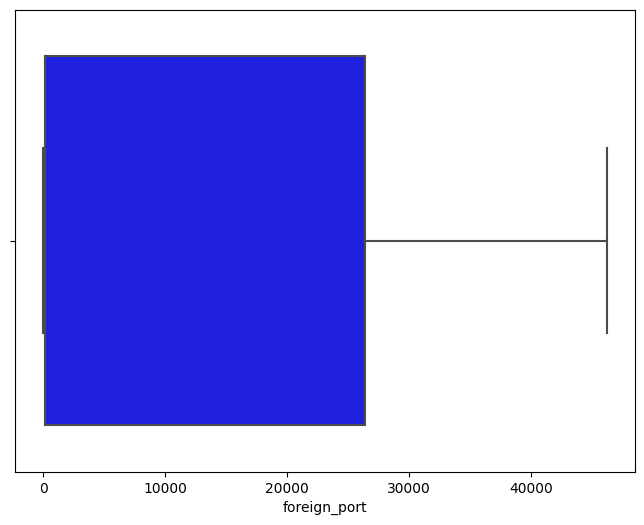

In [28]:
outliers_boxplot(df_subset, "foreign_port", "blue")

Statiscal Operation of features local_port:
 

 Min = 0 
 Max = 54039 
 1st Quantile = 179.0 
 Mean = 27388.746535677354 
 Median = 39585.0 
 3rd Quantile = 45827.0 
 IQR = 45648.0

 Rate outliers: 0.00%


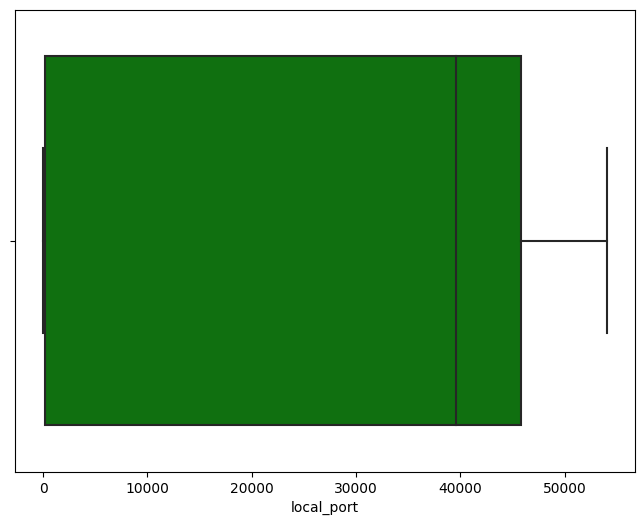

In [29]:
outliers_boxplot(df_subset, "local_port", "green")

We observe that our features are for the most part well distributed. But the variable explicit_withdraw requires a particular operation because it has outliers.

**Non Linear Strength**

In [30]:
#Create a RandomForestRegressor model
X = df_pi_without_type.drop('type_code', axis=1)
y = df_pi_without_type['type_code']
rf = RandomForestRegressor(max_depth= 5, max_features= 'auto', min_samples_leaf= 4, min_samples_split=10, n_estimators= 50)

# Train the model
rf.fit(X, y)

# Extract important features
importances = rf.feature_importances_

# Create a pandas series
feature_importances = pd.Series(importances, index=X.columns)

#Sort features by the most important to the low important
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Extract the most important features
strongly_correlated_features_no_linear = sorted_feature_importances[sorted_feature_importances >= 0.05].index.tolist()

#Print the list
print("We extracted {} and they are: \n{}".format(len(strongly_correlated_features_no_linear), strongly_correlated_features_no_linear))

We extracted 2 and they are: 
['/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives']


<p>'/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives': this feature represents the number of keepalives received from a BGP neighbor specific for Cisco-IOS-XE network device.</p>
<p>'/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives': this feature represents the number of keepalives sent to a specific BGP neighbor for Cisco-IOS-XE network device.</p>
<p>'/computes0/metrics/hardware/hardware-cpu-load-15min': this feature represents the average CPU load over a period of 15 minutes for the computer system named "computes0".</p>

In [31]:
#Visualisation of no linear strength
df_no_subset = df_pi[['type_code', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives', '/computes0/metrics/hardware/hardware-cpu-load-15min']].copy()

#Rename
df_no_subset = df_no_subset.rename(columns={
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives': 'received_keepalives',
    '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives': 'sent_keepalives',
    '/computes0/metrics/hardware/hardware-cpu-load-15min': 'cpu_load_15min'
})

In [32]:
#Create Charts
#for col in df_no_subset.columns[1:]:
#    fig = px.histogram(df_no_subset, x=col, color='type_code')
#    fig.write_image(f'{direction}/figures/{col}_histogram.png')
#    fig.show()

In [33]:
gaussian_no_subset, right_skew_no_subset, left_skew_no_subset = identify_distribution(df_no_subset)

In [34]:
print("We have {} gaussian features, {} right skew features and {} left skew features".format(len(gaussian_no_subset), len(right_skew_no_subset), len(left_skew_no_subset)))

We have 0 gaussian features, 2 right skew features and 0 left skew features


Statiscal Operation of features received_keepalives:
 

 Min = 0 
 Max = 4358 
 1st Quantile = 233.25 
 Mean = 556.0852119958635 
 Median = 481.0 
 3rd Quantile = 813.0 
 IQR = 579.75

 Rate outliers: 0.10%


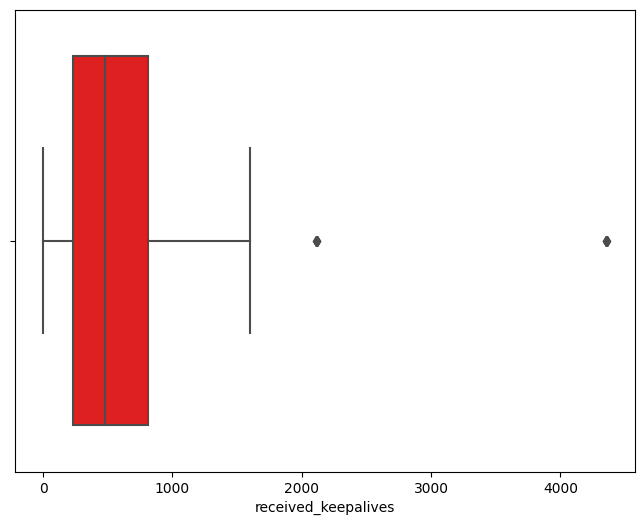

In [35]:
outliers_boxplot(df_no_subset, "received_keepalives", "red")

In [36]:
outlier_received_keepalives = df_no_subset[df_no_subset['received_keepalives'] > 2000]
outlier_received_keepalives

,type_code,received_keepalives,sent_keepalives,cpu_load_15min
6,1,4353,4255,17.16
7,1,4354,4256,17.07
8,1,4355,4257,17.07
9,1,4357,4257,16.79
10,1,4358,4259,16.69
1940,1,2113,2003,17.20
1941,1,2114,2004,17.02
1942,1,2115,2004,17.02
1943,1,2116,2005,16.62
1944,1,2117,2005,16.44


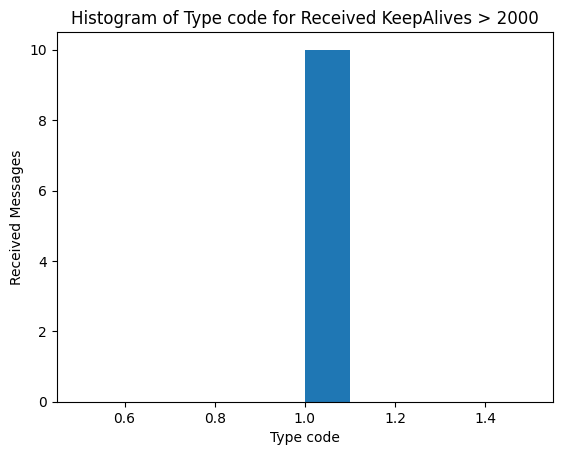

In [37]:
plt.hist(outlier_received_keepalives['type_code'])
plt.xlabel('Type code')
plt.ylabel('Received Messages')
plt.title('Histogram of Type code for Received KeepAlives > 2000')
plt.show()

Statiscal Operation of features sent_keepalives:
 

 Min = 0 
 Max = 4259 
 1st Quantile = 218.0 
 Mean = 529.0397104446743 
 Median = 456.5 
 3rd Quantile = 777.0 
 IQR = 559.0

 Rate outliers: 0.10%


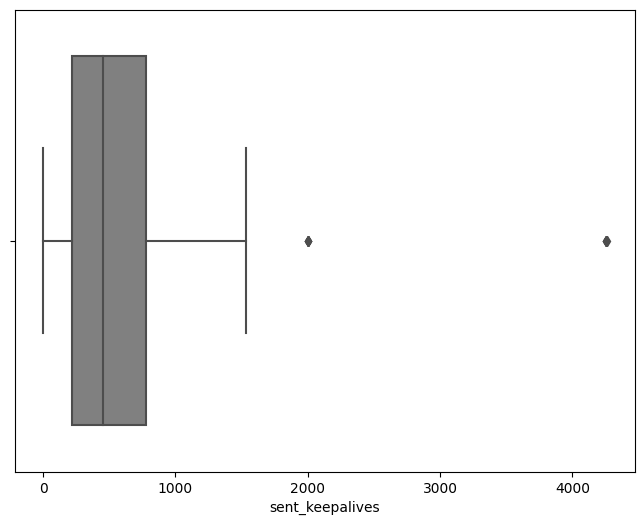

In [38]:
outliers_boxplot(df_no_subset, "sent_keepalives", "gray")

In [39]:
outlier_sent_keepalives = df_no_subset[df_no_subset['sent_keepalives'] > 2000]
outlier_sent_keepalives

,type_code,received_keepalives,sent_keepalives,cpu_load_15min
6,1,4353,4255,17.16
7,1,4354,4256,17.07
8,1,4355,4257,17.07
9,1,4357,4257,16.79
10,1,4358,4259,16.69
1940,1,2113,2003,17.20
1941,1,2114,2004,17.02
1942,1,2115,2004,17.02
1943,1,2116,2005,16.62
1944,1,2117,2005,16.44


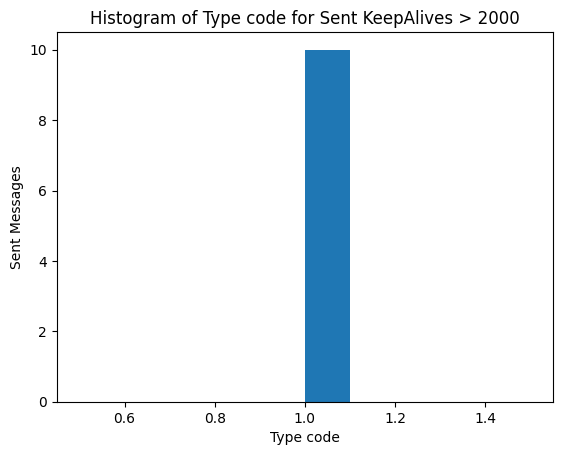

In [40]:
plt.hist(outlier_sent_keepalives['type_code'])
plt.xlabel('Type code')
plt.ylabel('Sent Messages')
plt.title('Histogram of Type code for Sent KeepAlives > 2000')
plt.show()

Statiscal Operation of features cpu_load_15min:
 

 Min = 15.7 
 Max = 21.44 
 1st Quantile = 17.38 
 Mean = 17.70779576008273 
 Median = 17.7 
 3rd Quantile = 18.01 
 IQR = 0.6300000000000026

 Rate outliers: 2.81%


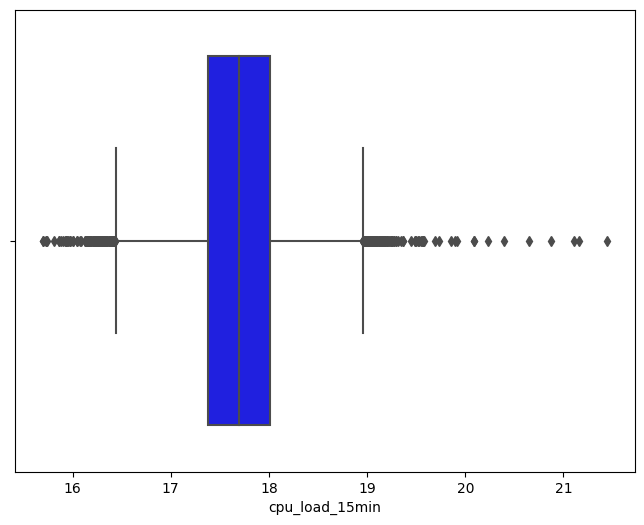

In [41]:
outliers_boxplot(df_no_subset, "cpu_load_15min", "blue")

In [42]:
outlier_cpu_19 = df_no_subset[df_no_subset['cpu_load_15min'] > 19]
outlier_cpu_19

,type_code,received_keepalives,sent_keepalives,cpu_load_15min
540,6,561,538,19.09
1216,7,1311,1247,19.06
1217,7,1312,1248,19.06
1413,7,1529,1462,19.05
1414,7,1530,1464,19.06
...,...,...,...,...
9399,8,208,200,19.19
9400,9,209,201,19.06
9498,10,320,302,19.01
9501,9,324,304,19.05


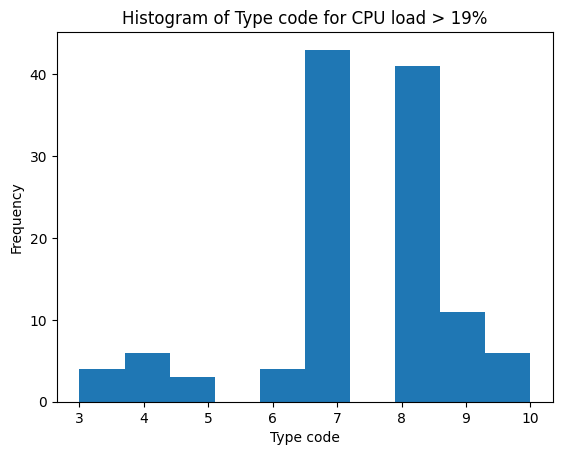

In [43]:
plt.hist(outlier_cpu_19['type_code'])
plt.xlabel('Type code')
plt.ylabel('Frequency')
plt.title('Histogram of Type code for CPU load > 19%')
plt.show()

In [44]:
outlier_cpu_16 = df_no_subset[df_no_subset['cpu_load_15min'] < 16.5]
outlier_cpu_16

,type_code,received_keepalives,sent_keepalives,cpu_load_15min
11,2,2,2,16.490
17,1,9,8,16.480
18,1,10,10,16.405
19,1,10,11,16.405
20,1,12,12,16.410
...,...,...,...,...
9665,11,505,465,16.480
9666,11,506,465,16.380
9667,11,507,466,16.380
9668,12,508,467,16.450


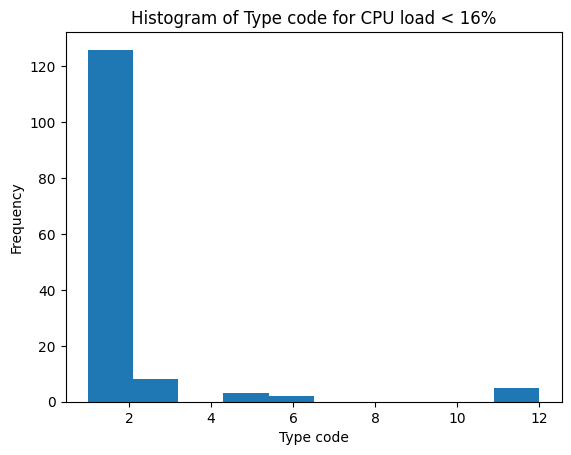

In [45]:
plt.hist(outlier_cpu_16['type_code'])
plt.xlabel('Type code')
plt.ylabel('Frequency')
plt.title('Histogram of Type code for CPU load < 16%')
plt.show()

Now we'll build a list whose contains all important features to do Model. In Previous analyze on the others datasets, we saw the time. We need to add features times to classify state of the network.

In [46]:
def concat_and_remove_duplicates(list1, list2):
    #Concat two lists
    concatenated_list = list1 + list2
    #Create a set 
    unique_list = list(set(concatenated_list))
    #Return data
    return unique_list

In [47]:
final = concat_and_remove_duplicates(strongly_correlated_features_l, strongly_correlated_features_no_linear)

Final is the list who contains all the important features.

In [48]:
print("We have {} important features and they are: \n {}".format(len(final), final))

We have 5 important features and they are: 
 ['type_code', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives', '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port']


## KPI

<p>In this part we'll create new features. Features we'll create are KPI(Key Performance Indicator), they will help to understand and see performance of some parameters of the data. KPI will also help the model to understand the data and generalize.</p>
<p>KPIs that could help our model predict bad packets in the case of routing information failure analysis in backbone IP networks could include:</p>
<p>Packet latency: This can be measured by calculating the time elapsed between sending and receiving a packet. High latency values may indicate problems in the routing information.</p>
<p>Packet loss rate: This can be measured by counting the number of packets lost against the total number of packets sent. A high packet loss rate may indicate problems in the distribution of routing information.</p>
<p>Network congestion: This can be measured by monitoring the amount of network traffic at any given time. High levels of congestion can indicate poor handling of routing information.
Network load: This can be measured by monitoring the amount of network traffic at any given time. High levels of traffic can indicate performance issues in handling routing information.</p>
<p>Node availability: This can be measured by monitoring the number of active nodes versus the total number of nodes. High levels of idle nodes can indicate problems in the distribution of routing information.</p>
<p>Quality of Service (QoS): This can be measured by monitoring transmission delays and packet loss for different service priority levels. Poor QoS levels can indicate problems in routing information distribution.
Number of established connections: This can be measured by counting the number of established connections at any given time. High levels of established connections can indicate poor management of routing information.
</p>

**CPU**

In [49]:
#Build a function to search specific word from all features on the dataset
def research_columns(df, finding):
  finding = str(finding)
  result =[]
  for i in range(0,len(df.columns)):
    if re.search(finding,df.columns[i]):
      result.append(df.columns[i])
  
  return result

In [50]:
research_columns(df_pi_without_type, "cpu")

['/computes0/vcpus_used',
 '/computes0/vcpus',
 '/computes0/cpu_info/topology/cores',
 '/computes0/cpu_info/topology/cells',
 '/computes0/cpu_info/topology/threads',
 '/computes0/cpu_info/topology/sockets',
 '/computes0/metrics/compute-node/compute-node-cpu-frequency',
 '/computes0/metrics/compute-node/compute-node-cpu-idle-percent',
 '/computes0/metrics/compute-node/compute-node-cpu-idle-time',
 '/computes0/metrics/compute-node/compute-node-cpu-iowait-percent',
 '/computes0/metrics/compute-node/compute-node-cpu-iowait-time',
 '/computes0/metrics/compute-node/compute-node-cpu-kernel-percent',
 '/computes0/metrics/compute-node/compute-node-cpu-kernel-time',
 '/computes0/metrics/compute-node/compute-node-cpu-percent',
 '/computes0/metrics/compute-node/compute-node-cpu-user-percent',
 '/computes0/metrics/compute-node/compute-node-cpu-user-time',
 '/computes0/metrics/hardware/hardware-cpu-load-15min',
 '/computes0/metrics/hardware/hardware-cpu-load-1min',
 '/computes0/metrics/hardware/hard

In [51]:
def rapport_statistic(data, y):
    
    #Statistical Summaries
    print("Statiscal Operation of features {}:\n ".format(y))
    min_y = np.min(data[y]) 
    max_y = np.max(data[y])
    q1 = data[y].quantile(0.25)
    mean_y = np.mean(data[y])
    median_y = np.median(data[y])
    q3 = data[y].quantile(0.75)
    iqr = q3 - q1
    print("\n Min = {} \n Max = {} \n 1st Quantile = {} \n Mean = {} \n Median = {} \n 3rd Quantile = {} \n IQR = {}".format(min_y, max_y, q1, mean_y, median_y, q3, iqr))
    
    #Detect outliers
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    outliers = data[(data[y] < lower_bound) | (data[y] > upper_bound)]
    outlier_rate = len(outliers) / len(data[y])
    print("\n Rate outliers: {:.2%}".format(outlier_rate))
    
    #Charts
    plt.figure(figsize=(7,5))
    sns.histplot(data=data, x=y, kde=True).set_title(y)
    plt.show()

Statiscal Operation of features /devices#IntGW-01/metrics/cpu_util:
 

 Min = 0.0 
 Max = 68.488295381249 
 1st Quantile = 62.65394751294091 
 Mean = 62.60738108282288 
 Median = 63.263264587656884 
 3rd Quantile = 63.73632278746982 
 IQR = 1.082375274528907

 Rate outliers: 11.84%


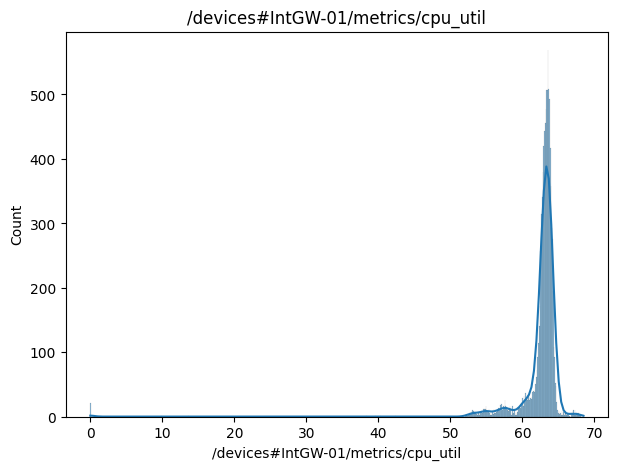

In [52]:
rapport_statistic(df_pi_without_type, '/devices#IntGW-01/metrics/cpu_util')

Statiscal Operation of features /computes0/metrics/hardware-ipmi-temperature#03-cpu_2_(0x5)/hardware-ipmi-temperature:
 

 Min = 40.0 
 Max = 59.0 
 1st Quantile = 53.0 
 Mean = 53.4100310237849 
 Median = 53.0 
 3rd Quantile = 54.0 
 IQR = 1.0

 Rate outliers: 1.71%


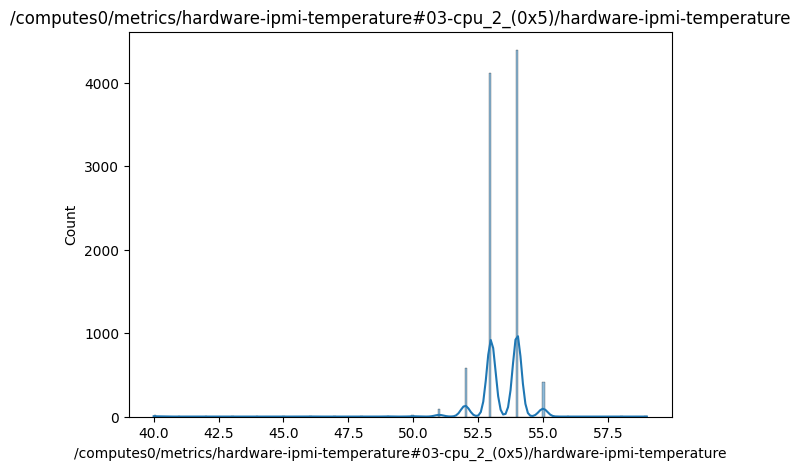

In [53]:
rapport_statistic(df_pi_without_type, '/computes0/metrics/hardware-ipmi-temperature#03-cpu_2_(0x5)/hardware-ipmi-temperature')

Cpu_utils and Hardware_temperature represents CPU load in % and CPU temperature respectively. The data don't give more information to conclude for a congestion.

**Latency**

In [54]:
research_columns(df_pi_without_type, "latency")

['/devices#IntGW-01/metrics/disk-device-read-latency',
 '/devices#IntGW-01/metrics/disk-device-write-latency',
 '/devices#IntGW-02/metrics/disk-device-read-latency',
 '/devices#IntGW-02/metrics/disk-device-write-latency',
 '/devices#RR-01/metrics/disk-device-read-latency',
 '/devices#RR-01/metrics/disk-device-write-latency',
 '/devices#TR-01/metrics/disk-device-read-latency',
 '/devices#TR-01/metrics/disk-device-write-latency',
 '/devices#TR-02/metrics/disk-device-read-latency',
 '/devices#TR-02/metrics/disk-device-write-latency']

Thanks to previous research, we have concluded that we have very high latencies for a 4G and 5G operator. And we still notice that the writing speed of the disc is beyond a second and even reached for some minutes. Presence of a bottleneck in our network. In general, 5G offers lower latency than 4G, which means data is transmitted faster. 5G can offer latency times of less than 1 millisecond, while 4G can offer latency times of up to 50 milliseconds.

In [55]:
features_latency = ['/devices#IntGW-01/metrics/disk-device-read-latency',
            '/devices#IntGW-01/metrics/disk-device-write-latency',
            '/devices#IntGW-02/metrics/disk-device-read-latency',
            '/devices#IntGW-02/metrics/disk-device-write-latency',
            '/devices#RR-01/metrics/disk-device-read-latency',
            '/devices#RR-01/metrics/disk-device-write-latency',
            '/devices#TR-01/metrics/disk-device-read-latency',
            '/devices#TR-01/metrics/disk-device-write-latency',
            '/devices#TR-02/metrics/disk-device-read-latency',
            '/devices#TR-02/metrics/disk-device-write-latency']

# Creation of the key1 to detect anormal latency
df_pi_without_type['key1'] = df_pi_without_type[features_latency].apply(lambda row: 0 if (row < 5e+7).all() else 1, axis=1)

In [56]:
df_pi_without_type['key1'].value_counts()

1    9301
0     369
Name: key1, dtype: int64

In [57]:
#Create a new dataframe for latency data only
#We can use it for predict
features_latency.append('key1')
features_latency.append('/time')
data_latency = df_pi_without_type[features_latency].copy()

In [58]:
data_latency.head(3)

,/devices#IntGW-01/metrics/disk-device-read-latency,/devices#IntGW-01/metrics/disk-device-write-latency,/devices#IntGW-02/metrics/disk-device-read-latency,/devices#IntGW-02/metrics/disk-device-write-latency,/devices#RR-01/metrics/disk-device-read-latency,/devices#RR-01/metrics/disk-device-write-latency,/devices#TR-01/metrics/disk-device-read-latency,/devices#TR-01/metrics/disk-device-write-latency,/devices#TR-02/metrics/disk-device-read-latency,/devices#TR-02/metrics/disk-device-write-latency,key1,/time
0,0.0,0.000000e+00,15585759.0,0.0,5643616.0,2.872944e+11,2805620.0,2.889247e+11,4331170.0,2.862511e+11,1,1593395580
1,10276791.0,2.875417e+11,15585759.0,0.0,0.0,0.000000e+00,2805620.0,2.889247e+11,4331170.0,2.862516e+11,1,1593395640
2,0.0,0.000000e+00,15585759.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,4331170.0,2.862516e+11,1,1593395700


1 represents all the anormal latency. Anormal latency is done by congestion or retransmission of packets, we have many explications but it's anormal to have large latency.

**Nodes**

In [59]:
df_pi_without_type[research_columns(df_pi_without_type, "node")]

,/computes0/metrics/compute-node/compute-node-cpu-frequency,/computes0/metrics/compute-node/compute-node-cpu-idle-percent,/computes0/metrics/compute-node/compute-node-cpu-idle-time,/computes0/metrics/compute-node/compute-node-cpu-iowait-percent,/computes0/metrics/compute-node/compute-node-cpu-iowait-time,/computes0/metrics/compute-node/compute-node-cpu-kernel-percent,/computes0/metrics/compute-node/compute-node-cpu-kernel-time,/computes0/metrics/compute-node/compute-node-cpu-percent,/computes0/metrics/compute-node/compute-node-cpu-user-percent,/computes0/metrics/compute-node/compute-node-cpu-user-time
0,1216.0,63.0,4.229692e+17,0.0,2.193781e+13,8.0,4.346050e+16,36.0,27.0,1.396145e+17
1,1506.0,63.0,4.229711e+17,0.0,2.193790e+13,8.0,4.346074e+16,36.0,27.0,1.396153e+17
2,1198.0,63.0,4.229729e+17,0.0,2.193806e+13,8.0,4.346097e+16,36.0,28.0,1.396161e+17
3,1210.0,63.0,4.229747e+17,0.0,2.193813e+13,8.0,4.346121e+16,36.0,27.0,1.396169e+17
4,1639.0,63.0,4.229765e+17,0.0,2.193823e+13,8.0,4.346145e+16,36.0,27.0,1.396177e+17
...,...,...,...,...,...,...,...,...,...,...
9665,2161.0,66.0,4.404590e+17,0.0,2.286162e+13,6.0,4.569270e+16,33.0,26.0,1.472265e+17
9666,1963.0,65.0,4.404609e+17,0.0,2.286166e+13,7.0,4.569291e+16,34.0,26.0,1.472273e+17
9667,2097.0,65.0,4.404628e+17,0.0,2.286178e+13,7.0,4.569311e+16,34.0,26.0,1.472281e+17
9668,1617.0,66.0,4.404647e+17,0.0,2.286185e+13,7.0,4.569332e+16,33.0,26.0,1.472288e+17


Statiscal Operation of features /computes0/metrics/compute-node/compute-node-cpu-percent:
 

 Min = 28.000000000000004 
 Max = 65.0 
 1st Quantile = 35.0 
 Mean = 35.58686659772492 
 Median = 36.0 
 3rd Quantile = 36.0 
 IQR = 1.0

 Rate outliers: 3.78%


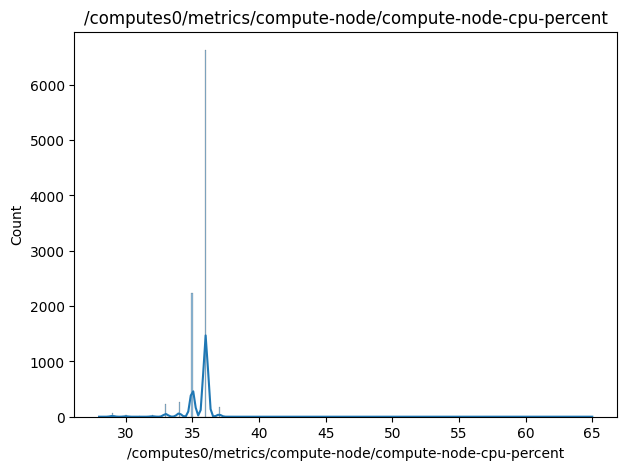

In [60]:
rapport_statistic(df_pi_without_type, '/computes0/metrics/compute-node/compute-node-cpu-percent')

If the value is high and/or consistently close to 100%, it may indicate that the processor is overloaded and the performance of the environment is reduced. If the value is consistently low, it may indicate that CPU resources are not being utilized optimally.

Let's append the features in the list.

In [61]:
final.append('/time') 
#final.append('/computes0/metrics/compute-node/compute-node-cpu-percent')
#final.append('/devices#IntGW-01/metrics/cpu_util')
#final.append('/computes0/metrics/hardware-ipmi-temperature#03-cpu_2_(0x5)/hardware-ipmi-temperature')
#final.append('key1')

In [62]:
data_final = df_pi_without_type[final].copy()
data_final.head()

,type_code,/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw,/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port,/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives,/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port,/time
0,0,0,46410,565,179,1593395580
1,0,0,46410,566,179,1593395640
2,0,0,46410,567,179,1593395700
3,0,0,46410,568,179,1593395760
4,0,0,46410,569,179,1593395820


In [63]:
research_columns(df_pi_without_type, "unicast")

['/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/in-unicast-pkts',
 '/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/out-unicast-pkts',
 '/devices/modules/openconfig-interfaces/interfaces/interface/subinterfaces/subinterface/state/counters/in-unicast-pkts',
 '/devices/modules/openconfig-interfaces/interfaces/interface/subinterfaces/subinterface/state/counters/out-unicast-pkts',
 '/devices/modules/ietf-interfaces/interfaces-state/interface/statistics/in-unicast-pkts',
 '/devices/modules/ietf-interfaces/interfaces-state/interface/statistics/out-unicast-pkts',
 '/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/in-unicast-pkts',
 '/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/out-unicast-pkts']

In [64]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9670 entries, 0 to 9669
Data columns (total 6 columns):
 #   Column                                                                                                              Non-Null Count  Dtype
---  ------                                                                                                              --------------  -----
 0   type_code                                                                                                           9670 non-null   int64
 1   /devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw     9670 non-null   int64
 2   /devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port                       9670 non-null   int64
 3   /devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives  9670 non-null   int64
 4   /devices/modules/Cisco-IOS-XE-b

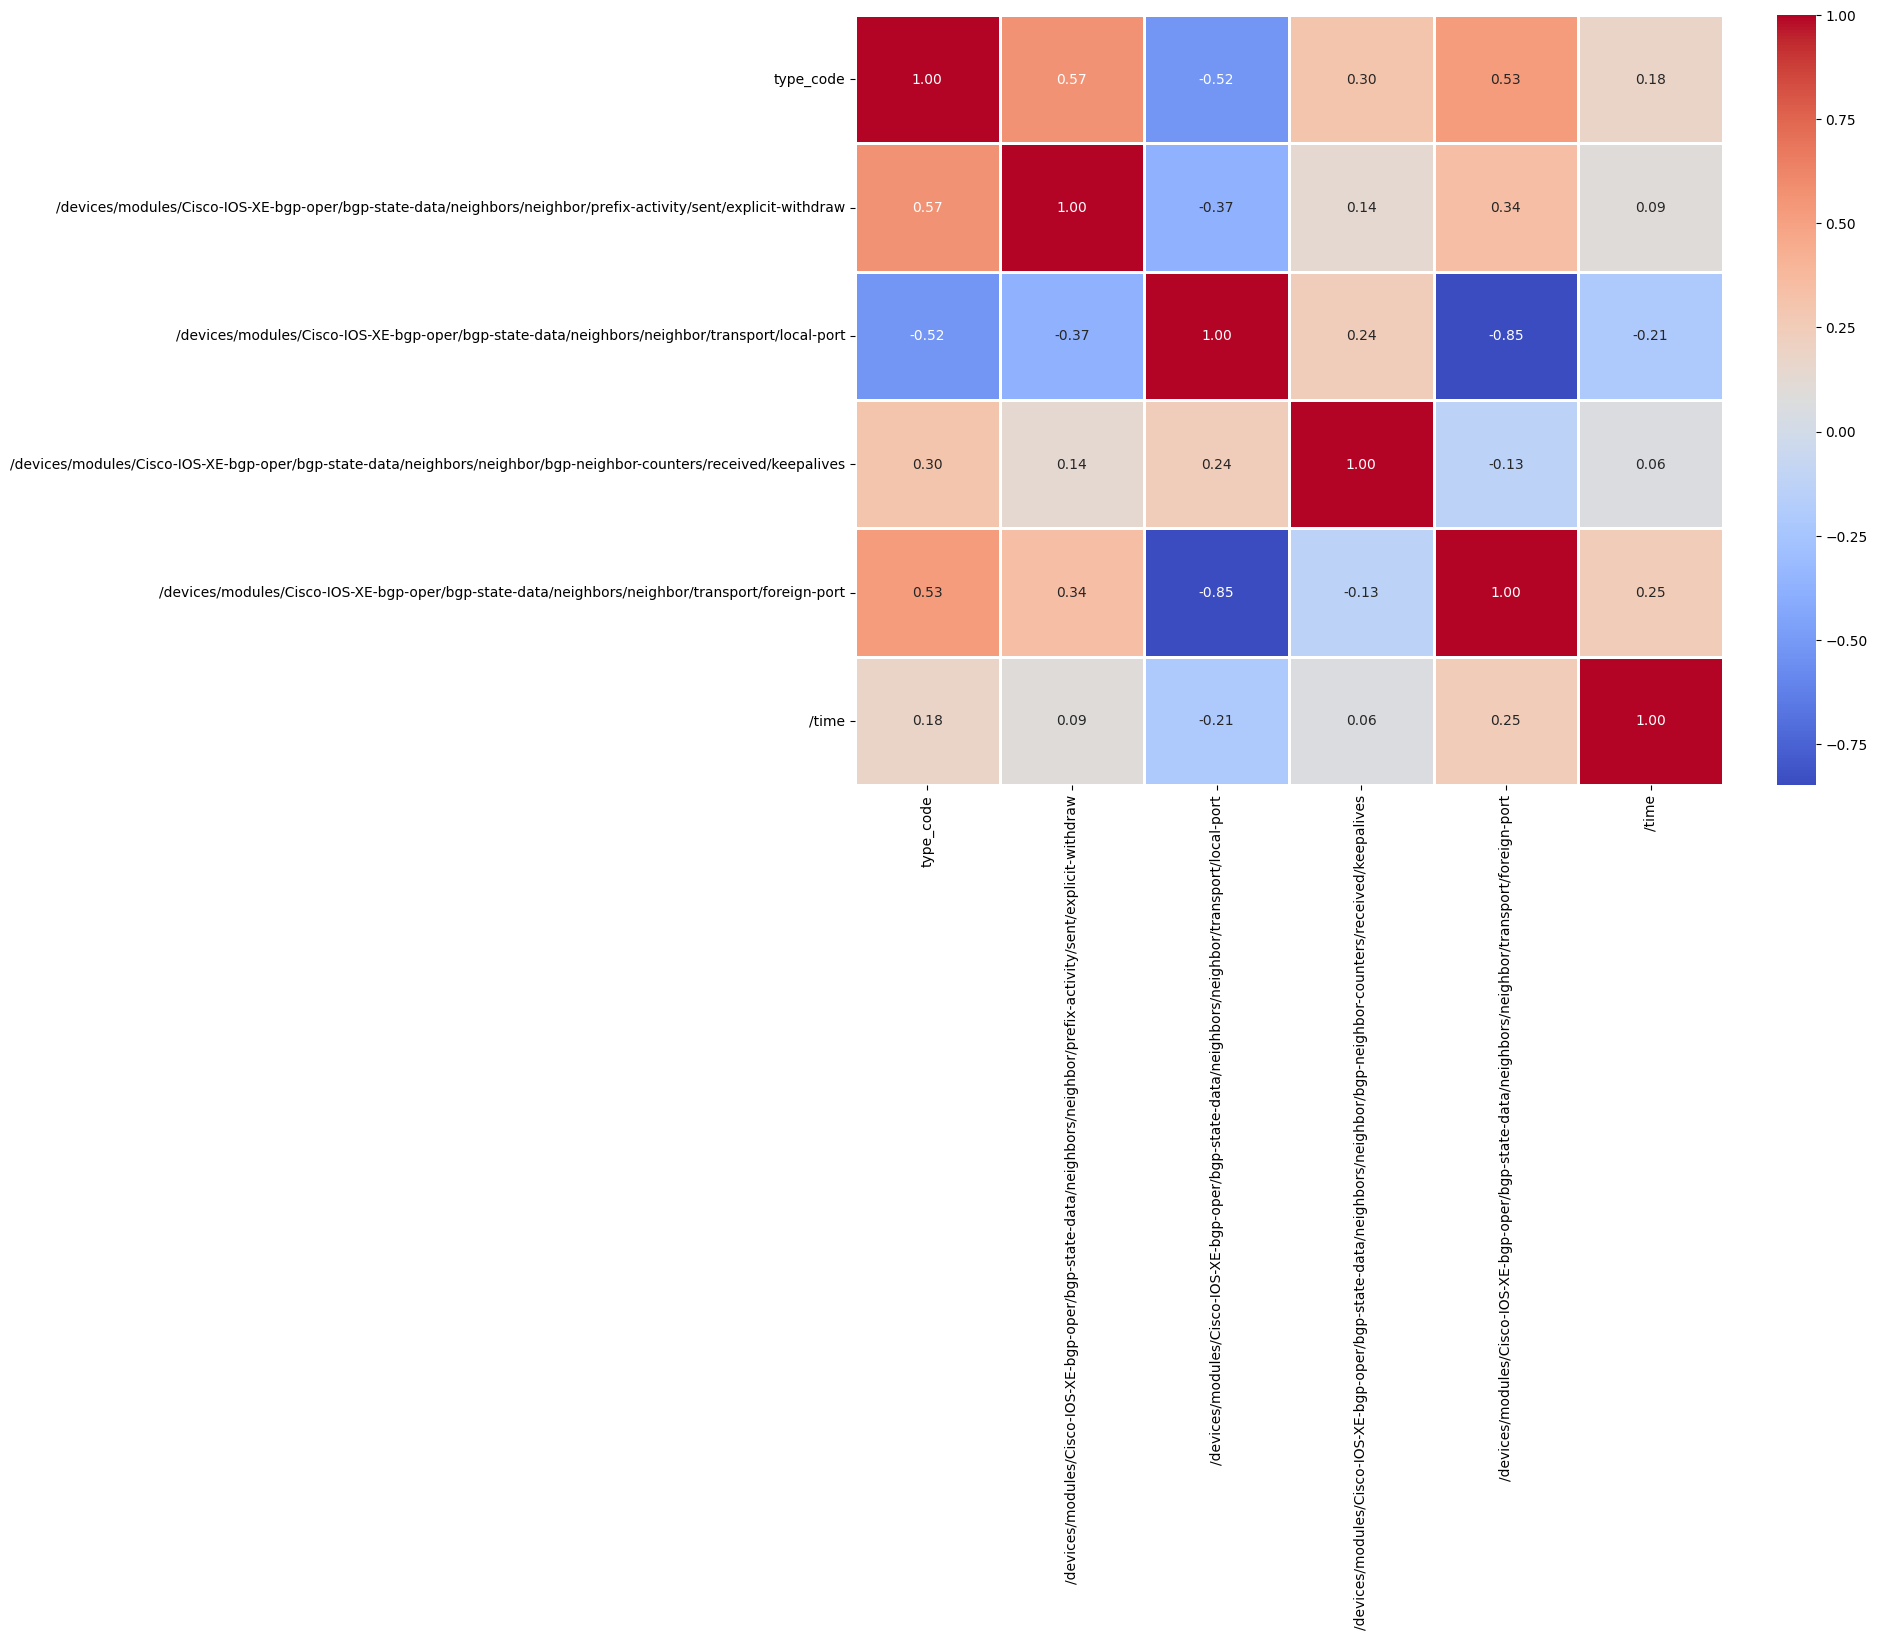

In [65]:
#Matrix Correlation
corr = data_final.corr()

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=1, linecolor='white')
plt.show()

In [66]:
def remove_correlated_features(df):
    #Create Correlation Matrix
    corr_matrix = df.corr().abs()
    #Boolean Mask
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    #Select Features with 100% of correlation
    correlated_cols = [col for col in corr_matrix.columns if any(corr_matrix.loc[corr_matrix[col] == 1, col].index.difference([col]))]
    #Drop
    df = df.drop(columns=correlated_cols)
    return df

In [67]:
data_final = remove_correlated_features(data_final)

In [68]:
new_cols = {'/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port': 'foreign_port',
            '/computes0/metrics/hardware/hardware-cpu-load-15min': 'cpu_load_15min',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw': 'sent_explicit_withdraw',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/total-prefixes': 'sent_total_prefixes',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/updates': 'sent_updates',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent': 'messages_sent',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives': 'received_keepalives',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port': 'local_port',
            'type_code': 'type_code',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw': 'sent_implicit_withdraw',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives': 'sent_keepalives',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received': 'messages_received',
            '/time': 'time',
            '/computes0/metrics/compute-node/compute-node-cpu-percent': 'compute_node_cpu_percent',
            '/devices#IntGW-01/metrics/cpu_util': 'cpu_util_IntGW_01',
            '/computes0/metrics/hardware-ipmi-temperature#03-cpu_2_(0x5)/hardware-ipmi-temperature': 'hardware_ipmi_temperature_cpu_2'}
            
data_final = data_final.rename(columns=new_cols)

In [69]:
df_pi['type'].value_counts()

tap-delay-stop                   1751
tap-loss-stop                    1745
tap-delay-start                  1710
tap-loss-start                   1707
interface-down                    559
interface-up                      559
ixnetwork-bgp-injection-stop      462
ixnetwork-bgp-injection-start     456
ixnetwork-bgp-hijacking-start     228
ixnetwork-bgp-hijacking-stop      227
node-down                         130
node-up                           130
ixnetwork-traffic-start             6
Name: type, dtype: int64

In [70]:
df_pi['type_code'].value_counts()

8     1751
6     1745
7     1710
5     1707
3      559
4      559
10     462
9      456
11     228
12     227
1      130
2      130
0        6
Name: type_code, dtype: int64

In [71]:
type_dict = {
    "ixnetwork-traffic-start": 0,
    "node-down": 1,
    "node-up": 2,
    "interface-down": 3,
    "interface-up": 4,
    "tap-loss-start": 5,
    "tap-loss-stop": 6,
    "tap-delay-start": 7,
    "tap-delay-stop": 8,
    "ixnetwork-bgp-injection-start": 9,
    "ixnetwork-bgp-injection-stop": 10,
    "ixnetwork-bgp-hijacking-start": 11, 
    "ixnetwork-bgp-hijacking-stop": 12,
}

<u>Meaning of type_code values:</u><br>
* "ixnetwork-traffic-start": 0: start traffic generation from the IxNetwork command console.
 * "node-down": 1: the breakdown of a network node.
 * "node-up": 2: network nodes are working normally.
 * "interface-down": 3: failure of a network interface.
 * "interface-up": 4: network interfaces are working normally,
 * "tap-loss-start": 5: Packet loss on a network interface.
 * "tap-loss-stop": 6: connectivity and traffic quality is at their normal state,
 * "tap-delay-start": 7: A transmission delay is added to all packets passing through the network interface.
 * "tap-delay-stop": 8: Packet transmission will be restored to its normal state.
 * "ixnetwork-bgp-injection-start": 9: This command tests the network's ability to handle BGP announcements and make appropriate routing decisions.
 * "ixnetwork-bgp-injection-stop": 6: This command stops the simulation of BGP announcements and restores network connectivity to its normal state.,
 * "ixnetwork-bgp-hijacking-start": 11: BGP advertisements can be injected into the network to simulate a BGP hijacking attack.
 * "ixnetwork-bgp-hijacking-start": 11: BGP advertisements can be injected into the network to simulate a BGP hijacking attack.
 * "ixnetwork-bgp-hijacking-stop": 12: This command stops the simulation of malicious BGP announcements and restores network connectivity to its normal state.

# <font size=6 id='data-preparation'>**DATA** **PREPARATION**</font>

**Preprocessing**

In [72]:
def remove_redundant_cols(df):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] == 1)]
    df = df.drop(to_drop, axis=1)
    return df

In [73]:
data_final =remove_redundant_cols(data_final)

We prepare data for the latency. We'll classify it to know when th network is low.

In [74]:
data_latency['/time'] = pd.to_datetime(data_latency['/time'], unit='s')
data_latency['/time'].dt.tz_localize('UTC')
data_latency['/time'].dt.strftime('%Y-%m-%d %H:%M:%S')

0       2020-06-29 01:53:00
1       2020-06-29 01:54:00
2       2020-06-29 01:55:00
3       2020-06-29 01:56:00
4       2020-06-29 01:57:00
               ...         
9665    2020-07-05 19:24:00
9666    2020-07-05 19:25:00
9667    2020-07-05 19:26:00
9668    2020-07-05 19:27:00
9669    2020-07-05 19:28:00
Name: /time, Length: 9670, dtype: object

In [75]:
data_latency = data_latency.set_index('/time')

In [76]:
data_latency.head()

,/devices#IntGW-01/metrics/disk-device-read-latency,/devices#IntGW-01/metrics/disk-device-write-latency,/devices#IntGW-02/metrics/disk-device-read-latency,/devices#IntGW-02/metrics/disk-device-write-latency,/devices#RR-01/metrics/disk-device-read-latency,/devices#RR-01/metrics/disk-device-write-latency,/devices#TR-01/metrics/disk-device-read-latency,/devices#TR-01/metrics/disk-device-write-latency,/devices#TR-02/metrics/disk-device-read-latency,/devices#TR-02/metrics/disk-device-write-latency,key1
/time,,,,,,,,,,,
2020-06-29 01:53:00,0.0,0.000000e+00,1.558576e+07,0.000000e+00,5643616.0,2.872944e+11,2805620.0,2.889247e+11,4331170.0,2.862511e+11,1
2020-06-29 01:54:00,10276791.0,2.875417e+11,1.558576e+07,0.000000e+00,0.0,0.000000e+00,2805620.0,2.889247e+11,4331170.0,2.862516e+11,1
2020-06-29 01:55:00,0.0,0.000000e+00,1.558576e+07,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,4331170.0,2.862516e+11,1
2020-06-29 01:56:00,0.0,0.000000e+00,1.558576e+07,0.000000e+00,5643616.0,2.873012e+11,2805620.0,2.889318e+11,0.0,0.000000e+00,1
2020-06-29 01:57:00,0.0,0.000000e+00,2.303715e+09,2.685351e+11,5643616.0,2.873012e+11,0.0,0.000000e+00,0.0,0.000000e+00,1


These are the best features find with the features selection.

We will load a list that includes the different features obtained in the virtual, physical and network datasets. They represent the best features for each type.

In [77]:
#profile = ProfileReport(data_final, title='Rapport of the activity', html={'style':{'full_width':True}})

In [78]:
#profile
#Save the profile
#profile.to_file('report_best_features.html')

In [79]:
#Parameters important for deeplearning
seed=123
size_t=2
batch_size_t=1

In [80]:
def find_outliers(df, threshold=3):
    """
    This function detects the columns with the highest percentage of outliers and returns the percentage of outliers
    for each column.
    """
    outlier_cols = {}
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = len(outliers) / len(df) * 100
        if outlier_percentage > 0:
            outlier_cols[col] = outlier_percentage
    sorted_outliers = sorted(outlier_cols.items(), key=lambda x: x[1], reverse=True)
    return sorted_outliers


In [81]:
columns_anomalies = find_outliers(data_final)

In [82]:
len(columns_anomalies)

2

We have 250 columns that have outliers in our dataset, with varying rates up to

array([[<AxesSubplot: title={'center': 'type_code'}>,
        <AxesSubplot: title={'center': 'sent_explicit_withdraw'}>],
       [<AxesSubplot: title={'center': 'local_port'}>,
        <AxesSubplot: title={'center': 'received_keepalives'}>],
       [<AxesSubplot: title={'center': 'foreign_port'}>,
        <AxesSubplot: title={'center': 'time'}>]], dtype=object)

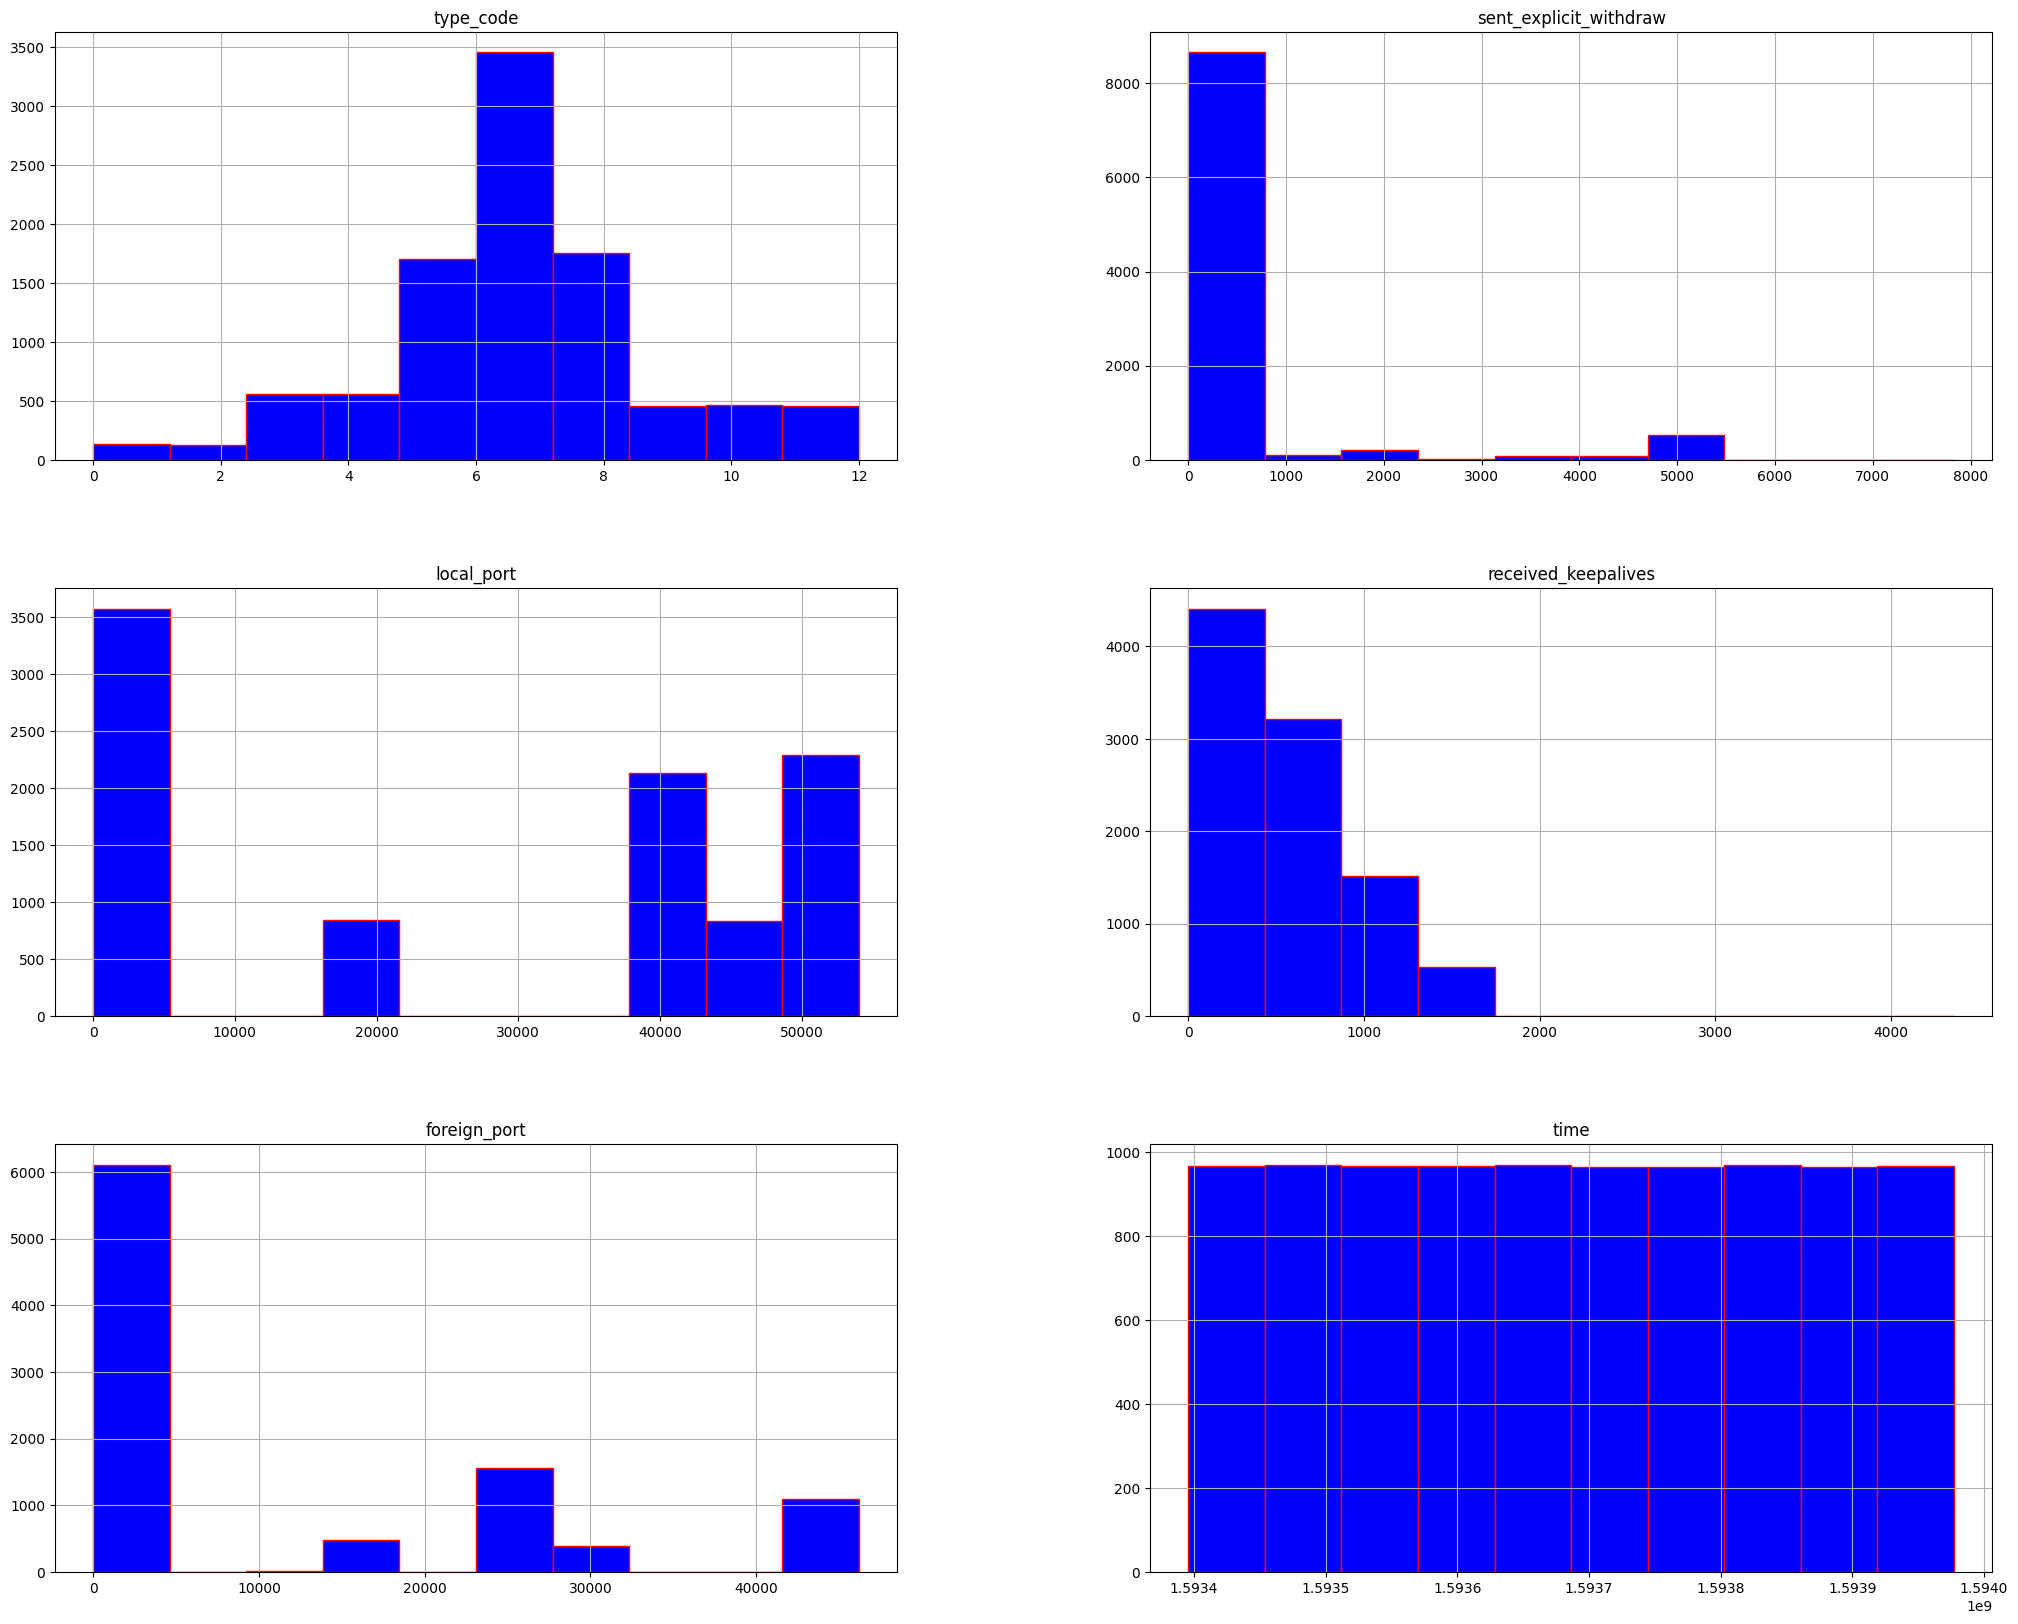

In [83]:
data_final.hist(bins=10, grid=True,figsize=(25,20), color="blue", edgecolor="red")

**Unsupervised Learning**

KMeans is an unsupervised clustering algorithm that aims to group similar data into a fixed number of groups (clusters) without having predefined targets. This algorithm works by randomly assigning points in the different clusters and calculating the distance between the points and the center of the cluster. Then, it adjusts the centers of the clusters by minimizing the sum of the squares of the distances of the points of the cluster from its center.

In the case where we have a target of 13 classes, we could use a supervised classification algorithm such as logistic regression, SVM, Random Forest, etc. However, we can also use KMeans to reduce the complexity of the classification task and reduce the number of features to consider. This could help identify similar patterns or groups of data that can be useful for the classification task. Then we can use a supervised classification algorithm to rank the different groups.

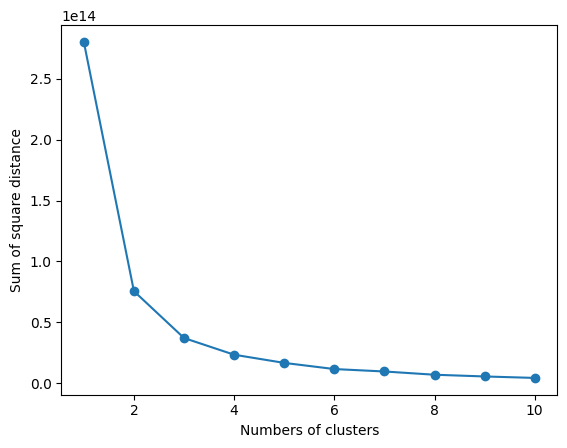

In [84]:
#Unsupervised Learning
T = data_final.drop('type_code', axis=1)

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(T)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Numbers of clusters')
plt.ylabel('Sum of square distance')
plt.show()

In [85]:
from sklearn.cluster import KMeans

#Instance KMeans
kmeans = KMeans(n_clusters=2, random_state=42)

#Train the model
kmeans.fit(data_final.drop('type_code', axis=1))

#Obtain predict
predictions = kmeans.predict(data_final.drop('type_code', axis=1))

In [86]:
predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [87]:
#Concatenate
data_final['predictions'] = predictions

In [88]:
print(" Summary of value of predicted class: \n","="*37)
data_final['predictions'].value_counts(normalize=True)

 Summary of value of predicted class: 


1    0.501344
0    0.498656
Name: predictions, dtype: float64

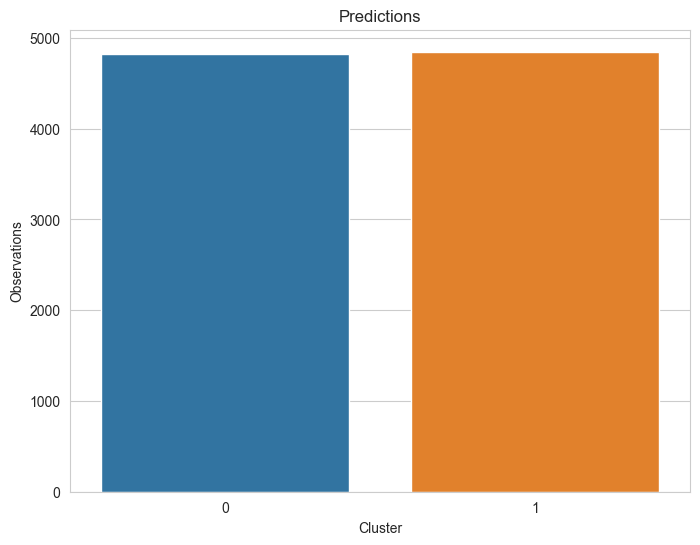

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='predictions', data=data_final)
plt.xlabel('Cluster')
plt.ylabel('Observations')
plt.title('Predictions')
plt.show()

It is clear that we have 2 clusters. And they are perfectly balanced. We have grouped the 13 classes into only 2 classes. Normal or Abnormal? Logically this is what our classes should represent.

In [90]:
data_final.groupby(['type_code', 'predictions'])['predictions'].count()

type_code  predictions
0          1                 6
1          0                52
           1                78
2          0                52
           1                78
3          0               223
           1               336
4          0               222
           1               337
5          0               686
           1              1021
6          0               695
           1              1050
7          0              1017
           1               693
8          0              1053
           1               698
9          0               272
           1               184
10         0               279
           1               183
11         0               136
           1                92
12         0               135
           1                92
Name: predictions, dtype: int64

The classes [0-1-2-3-4-5-6] are mostly 1s and [7-8-9-10-11-12] are 0s.

|Class 0| Class 1|
|------------|---------|
|7|0|
|8|1|
|9|2|
|10|3|
|11|4|
|12|5|
||6|

What can we see here? All 13 classes return. Why do they come back? Indeed it can happen that 0 is a good class or a bad class and so on for the others. This is quite logical in the field of networks. And now

In [91]:
data_final.head(3)

,type_code,sent_explicit_withdraw,local_port,received_keepalives,foreign_port,time,predictions
0,0,0,46410,565,179,1593395580,1
1,0,0,46410,566,179,1593395640,1
2,0,0,46410,567,179,1593395700,1


### ``` Observations:```

<p>We are on a problem of classification multi-classes and times series. So the approch to prepare our dataset will be different. It's important to know it.</p>
<p>Also we need to do detection of anomalies in the dataset.</p>

In [92]:
data_final['time'] = pd.to_datetime(data_final['time'], unit='s')
data_final['time'].dt.tz_localize('UTC')
data_final['time'].dt.strftime('%Y-%m-%d %H:%M:%S')

0       2020-06-29 01:53:00
1       2020-06-29 01:54:00
2       2020-06-29 01:55:00
3       2020-06-29 01:56:00
4       2020-06-29 01:57:00
               ...         
9665    2020-07-05 19:24:00
9666    2020-07-05 19:25:00
9667    2020-07-05 19:26:00
9668    2020-07-05 19:27:00
9669    2020-07-05 19:28:00
Name: time, Length: 9670, dtype: object

In [93]:
data_final['time'].astype('datetime64[ns]')
#Extract Hour
data_final['hour'] = pd.to_datetime(data_final['time']).dt.hour

In [94]:
data_final = data_final.set_index('time')

Time series are a stream of data that are created by making measures of something such as sales, temperature, stocks, etc. in fixed frequency. They have to be indexed in time order and usually used in weather forecasting, econometrics, earthquake prediction, signal processing, etc.

The Augmented Dickey-Fuller (ADF) test is a statistical test to check for the presence of unit roots in a time series dataset. The null hypothesis of the test assumes the existence of a unit root, indicating that the series is non-stationary, while the alternative hypothesis assumes that there is no unit root, indicating that the series is stationary.

The test statistic is compared to critical values at different levels of significance to determine whether to reject the null hypothesis or not. If the test statistic is less than the critical value, we can reject the null hypothesis and conclude that the series is stationary. If the test statistic is greater than the critical value, we fail to reject the null hypothesis and conclude that the series is non-stationary.

In summary, the ADF test helps us determine whether a time series dataset is stationary or not, which is important in many statistical modeling techniques, such as time series forecasting.

In [95]:
#Extract of the target
y = data_final['type_code']

# Test ADF
result = adfuller(y)

print('ADF Test Statistics:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("We can reject the null hypothesis: the time series is stationary")
else:
    print("We cannot reject the null hypothesis: the time series is non-stationary")

ADF Test Statistics: -5.491444275660775
p-value: 2.1706985134278785e-06
Critical Values: {'1%': -3.431029165587153, '5%': -2.8618401495227626, '10%': -2.5669297644753755}
We can reject the null hypothesis: the time series is stationary


In [96]:
#Extract Day
data_final['day_of_week'] = data_final.index.dayofweek

#Shift Value to predict the futur
#series_data['lag1'] = series_data['type_code'].shift(1)

In [97]:
data_final.head(3)

,type_code,sent_explicit_withdraw,local_port,received_keepalives,foreign_port,predictions,hour,day_of_week
time,,,,,,,,
2020-06-29 01:53:00,0,0,46410,565,179,1,1,0
2020-06-29 01:54:00,0,0,46410,566,179,1,1,0
2020-06-29 01:55:00,0,0,46410,567,179,1,1,0


Since we are going to make predictions of our data over time. We will use here a powerful Facebook library called fbprophet.

Facebook Prophet is an open-source library developed by Facebook for time series modeling and forecasting. It is based on a deterministic approach based on Generalized Additive Models (GAM) that allow modeling of non-linear trends, seasonal effects and holidays. Prophet is able to handle missing data, anomalies and trend changes, and it also provides tools for forecast quality assessment.

In [98]:
#Install fbprophet
#!pip install fbprophet

In [99]:
import fbprophet
print(fbprophet.__version__)

0.7.1


In [100]:
data_latency.sample(3)

,/devices#IntGW-01/metrics/disk-device-read-latency,/devices#IntGW-01/metrics/disk-device-write-latency,/devices#IntGW-02/metrics/disk-device-read-latency,/devices#IntGW-02/metrics/disk-device-write-latency,/devices#RR-01/metrics/disk-device-read-latency,/devices#RR-01/metrics/disk-device-write-latency,/devices#TR-01/metrics/disk-device-read-latency,/devices#TR-01/metrics/disk-device-write-latency,/devices#TR-02/metrics/disk-device-read-latency,/devices#TR-02/metrics/disk-device-write-latency,key1
/time,,,,,,,,,,,
2020-07-01 17:23:00,0.0,0.0,15585759.0,0.0,5643616.0,2.923633e+11,0.0,0.000000e+00,4331170.0,2.913480e+11,1
2020-06-29 06:39:00,0.0,0.0,15585759.0,0.0,0.0,0.000000e+00,2805620.0,2.893201e+11,4331170.0,2.866010e+11,1
2020-07-02 08:57:00,0.0,0.0,15585759.0,0.0,0.0,0.000000e+00,2805620.0,2.954937e+11,0.0,0.000000e+00,1


**Preprocessing**

We create a variable that takes a copy of the best features of our df_pi dataset. We are going to remove the '/time' column because it does not have a strong correlation strength and could bias the results.

In [101]:
#First we'll create another dataset to do classification without timeseries
data_class= df_pi_without_type[final].copy()

In [102]:
data_class = data_class.drop('/time', axis=1)

In [103]:
new_cols = {'/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port': 'foreign_port',
            '/computes0/metrics/hardware/hardware-cpu-load-15min': 'cpu_load_15min',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw': 'sent_explicit_withdraw',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/total-prefixes': 'sent_total_prefixes',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/updates': 'sent_updates',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent': 'messages_sent',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives': 'received_keepalives',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/local-port': 'local_port',
            'type_code': 'type_code',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw': 'sent_implicit_withdraw',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives': 'sent_keepalives',
            '/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received': 'messages_received',
            '/time': 'time',
            '/computes0/metrics/compute-node/compute-node-cpu-percent': 'compute_node_cpu_percent',
            '/devices#IntGW-01/metrics/cpu_util': 'cpu_util_IntGW_01',
            '/computes0/metrics/hardware-ipmi-temperature#03-cpu_2_(0x5)/hardware-ipmi-temperature': 'hardware_ipmi_temperature_cpu_2'}
            
data_class = data_class.rename(columns=new_cols)

In [104]:
#data_class['classify'] = predictions

In [105]:
data_class.sample(2)

,type_code,sent_explicit_withdraw,local_port,received_keepalives,foreign_port
1630,8,0,179,169,17382
1642,8,0,179,182,17382


This is a modified version of SMOTE. It combines the ability of both SMOTE and Tomek Links. SMOTE is capable of generating synthetic data for minority class. And, Tomek Links is able to remove the data that are identified as Tomek links from the majority class.

In [106]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [107]:
#Split the data
X = data_class.drop('type_code', axis=1)
y = data_class['type_code']

In [108]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [109]:
seed=128
train_x, val_x,train_y, val_y = train_test_split(X,y,test_size=0.2,stratify=y, random_state=seed)

Okay this dataset initialize sucessfully so, the next step it's to understand data and prepare the dataset for the model. 

We have outliers in our dataset, so it's better to use Robust Scaler
$X=  \displaystyle\frac{X - Mediane}{InterQuartile}$


Unlike MinMaxScaler(), RobustScaler() is not based on the minimum and maximum values of the data but rather on quartiles, which makes it less sensitive to outliers.

In [110]:
# Creation of the scaler
scaler = RobustScaler()
#Normalize
train_x_s = scaler.fit_transform(train_x)
val_x_s = scaler.transform(val_x)

In [111]:
from sklearn.utils import class_weight

In [112]:
weights = (data_class['type_code'].value_counts()/len(data_class)).to_dict()
print('weights : \n{}'.format(weights))

weights : 
{8: 0.1810754912099276, 6: 0.18045501551189244, 7: 0.1768355739400207, 5: 0.1765253360910031, 3: 0.0578076525336091, 4: 0.0578076525336091, 10: 0.04777662874870734, 9: 0.04715615305067218, 11: 0.02357807652533609, 12: 0.0234746639089969, 1: 0.01344364012409514, 2: 0.01344364012409514, 0: 0.0006204756980351603}


Principal Component Analysis (ACP) is a data analysis technique that reduces the dimensionality of a dataset by projecting it into a smaller space while preserving the maximum amount of information contained in the initial data.

More specifically, the CPA makes it possible to determine the main axes that explain the maximum variance in the data and to project them into a new space of reduced dimension, called the main space. These axes are determined by looking for the eigenvectors of the data covariance matrix, which represent the directions of the greatest variance in the data.

The CPA can be used for many data analysis tasks, such as data visualization, data compression, outliers detection, classification, etc. In general, it is used to reduce the dimensionality of a dataset containing a large number of variables, in order to facilitate the analysis and interpretation of data.

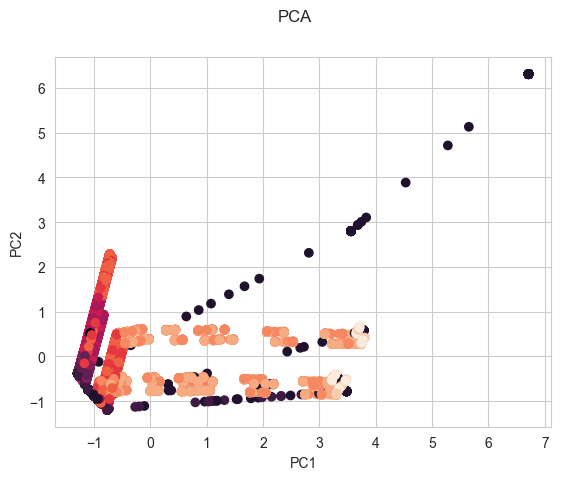

In [113]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(train_x_s)

# Plot PCA results
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=train_y)
plt.suptitle('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**TimeseriesGenerator**
<p>TimeseriesGenerator is a function of the Keras library that allows you to transform data in time series into a set of samples to be used for supervised learning of time series models. The function takes as input an array of input data (features), an array of target values (target), the length of each input sequence (length), the sample rate (sampling_rate), and the lot size (batch_size), and returns a sample generator that can be used to train a model. Each sample produced by the generator is a length input sequence with a corresponding target value. The sampling_rate parameter allows you to control the sampling frequency of input data. If the sampling rate is greater than 1, it means that some observations will be ignored.</p>

In [114]:
#Normalisation with RobustScaler
scaler = RobustScaler()
data_final_scaled = scaler.fit_transform(data_final)

In [115]:
#Initialize some parameters for the models

n_input = 10 # Windows_size
n_features = data_final_scaled.shape[1] # Numbers of Features
batch_size = 32 # Batch 
n_classes = len(np.unique(y)) # Numbers of classes

In [116]:
# Split the data first to train and test
x_train, x_valid, y_train, y_valid = train_test_split(data_final_scaled, to_categorical(data_final['type_code']), test_size=0.2, shuffle=False)

#Build 2 timeseriesgenerators for train and test 
train_generator = TimeseriesGenerator(x_train, y_train, length=n_input, batch_size=batch_size)
valid_generator = TimeseriesGenerator(x_valid, y_valid, length=n_input, batch_size=batch_size)

The train and validator generators (train_generator and valid_generator) are used to feed data continuously into the model, without the need to load the dataset into memory at once, which is especially important for large temporal data . Generators divide data into batches and return fixed size batches of data for deep learning.

It also helps prevent overfitting by using the cross-validation method to assess model performance while avoiding overfitting on the training data.

# <font size=6 id='modeling'>**MODELISATION**</font>

<p>In this part, we will set up models that will solve our problem which is here the detection of IP packet errors in a 4G and 5G network.</p>
<p>As you may have noticed earlier, we prepared our data with timeseriesgenerator because we are going to use LSTM to make predictions.</p>

<p><strong><i>Why LSTM?</i></strong> Actually it's because we work with complex temporal data and we need to be able to capture footage and remember previous days to make good prediction and LSTM and suitable for this task.</p>
<p>Also we will set up several templates for:</p>
<ul>
    <li>Classify the states of our network</li>
    <li>Detect anomalies that are errors</li>
    <li>Predicting latency states</li>
    <li>Predict if our network is congested</li>
</ul>

<p>We will also use Machine Learning models for our problem like XGBOOST</p>

### Classify state of the network

**Cross Validation**

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Cross-validation is a method for evaluating the performance of a statistical model. It consists of dividing the data set into k subsets, or "folds", using k-1 folds to train the model and the remaining fold to test it. This operation is repeated k times, changing the fold used for the test each time. This results in evaluations of the performance of the model that are then aggregated to obtain a more reliable estimate of performance on all the data.

This method makes it possible to use all samples for training and validation, and thus reduces the risk of over-learning (overfitting). It also makes it possible to obtain a more accurate estimate of the model's performance on unknown data.

KFold is a method from the scikit-learn library that is used to perform k-fold cross-validation. In this case, n_splits=5 means that the dataset will be divided into 5 equally sized folds for cross-validation. shuffle=True means that the data will be shuffled before splitting into folds. This helps to ensure that the folds are representative of the overall dataset and reduces the risk of overfitting. Finally, random_state=42 is a random seed that is used to ensure reproducibility of the results.

In [118]:
cv=KFold(n_splits=5, shuffle=True, random_state=42)

In [119]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [120]:
# Initialize the models
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [121]:
# Evaluate the models using cross-validation
scores_knn = cross_val_score(knn, X,y, cv=cv)
scores_rfc = cross_val_score(rfc, X, y, cv=cv)
scores_svc = cross_val_score(svc, X, y, cv=cv)
scores_xgb = cross_val_score(xgb, X, y, cv=cv)

In [122]:
# Print the average accuracy for each model
print("KNN:", scores_knn.mean())
print("Random Forest:", scores_rfc.mean())
print("SVM:", scores_svc.mean())
print("XGBoost:", scores_xgb.mean())

KNN: 0.8454505652427164
Random Forest: 0.8849011563475984
SVM: 0.2941615196454027
XGBoost: 0.8840662812560675


The results are quite interesting. We have as best model RandomForest and XGBOOST followed by KNN. Its models adapted to make a multiclass classification.

***KNN***

KNN (K-Nearest Neighbors) is a supervised learning algorithm used for classification and regression. In the KNN classification, the objective is to predict the class of a given observation by looking for the k closest observations in the characteristic space and assigning the majority class among these k neighbors.

In [123]:
#Params for knn
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x_s, train_y)
    train_accuracy[i] = knn.score(train_x_s, train_y)
    test_accuracy[i] = knn.score(val_x_s, val_y)

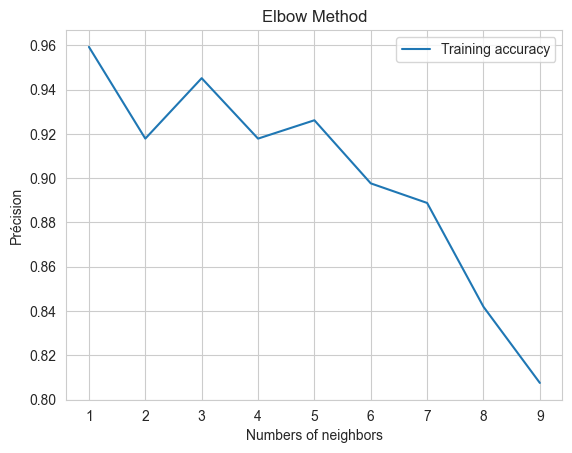

In [124]:
#Generate plot
plt.title('Elbow Method')
#plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Numbers of neighbors')
plt.ylabel('Précision')
plt.show()

In [125]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(train_x_s,train_y)
pred_knn=knn.predict(val_x_s)
print("Accuracy of the KNN model on the test set is :",knn.score(val_x_s,val_y)*100,"%")
print("Accuracy of the KNN model(Train_score):",knn.score(train_x_s,train_y)*100,"%")
score_knn = knn.score(val_x_s,val_y)*100

Accuracy of the KNN model on the test set is : 85.08675598506478 %
Accuracy of the KNN model(Train_score): 91.78473366282263 %


***RandomForest***

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.


In [126]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(train_x_s, train_y)

rfc_predict = rfc.predict(val_x_s)
print('Accuracy score of the RandomForest model on train set:',rfc.score(train_x_s,train_y)*100,'%')
print('Accuracy score of the RandomForest model on test set:',accuracy_score(val_y, rfc_predict)*100,'%')

Accuracy score of the RandomForest model on train set: 97.1334431630972 %
Accuracy score of the RandomForest model on test set: 88.68877663079289 %


In [127]:
# Compute confusion matrix
cm = confusion_matrix(val_y, rfc_predict)

print(cm)

[[350   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 310  40   0   0   0   0   0   0   0   0   0   0]
 [  0  25 325   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0 306  45   0   0   0   0   0   0   0   0]
 [  0   0   0  47 302   1   0   0   0   0   0   0   0]
 [  0   0   1   0   0 280  69   0   1   0   0   0   0]
 [  0   1   0   0   0  65 284   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2 287  61   0   0   0   0]
 [  0   1   0   0   0   0   1  66 282   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 340  10   0   0]
 [  0   0   0   0   0   0   0   0   0  12 338   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 312  38]
 [  0   0   0   0   0   0   0   0   0   0   0  28 322]]


In [128]:
print(classification_report(val_y, rfc_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.92      0.89      0.90       350
           2       0.89      0.93      0.91       351
           3       0.86      0.87      0.87       351
           4       0.87      0.86      0.87       350
           5       0.81      0.80      0.80       351
           6       0.80      0.81      0.80       350
           7       0.81      0.82      0.82       350
           8       0.82      0.81      0.81       350
           9       0.97      0.97      0.97       350
          10       0.97      0.97      0.97       350
          11       0.92      0.89      0.90       350
          12       0.89      0.92      0.91       350

    accuracy                           0.89      4553
   macro avg       0.89      0.89      0.89      4553
weighted avg       0.89      0.89      0.89      4553



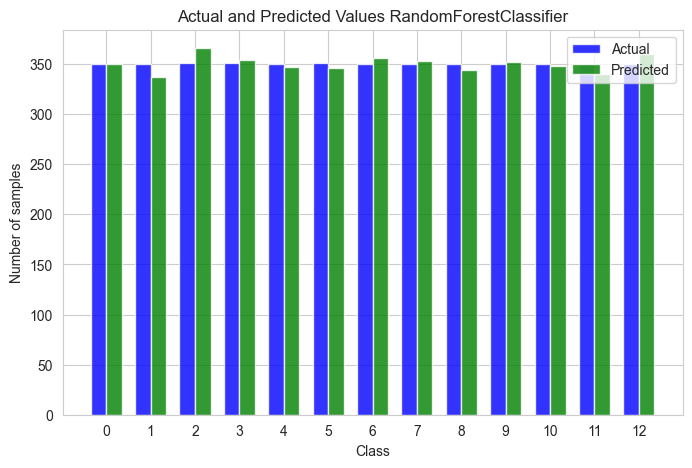

In [129]:
# Compute and plot stacked bar chart of actual and predicted values
n_classes = len(rfc.classes_)
actual_values = np.zeros(n_classes)
pred_values = np.zeros(n_classes)
for i in range(n_classes):
    actual_values[i] = np.sum(val_y == i)
    pred_values[i] = np.sum(rfc_predict == i)

fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_classes)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, actual_values, bar_width,
                alpha=opacity, color='b', label='Actual')

rects2 = ax.bar(index + bar_width, pred_values, bar_width,
                alpha=opacity, color='g', label='Predicted')

ax.set_xlabel('Class')
ax.set_ylabel('Number of samples')
ax.set_title('Actual and Predicted Values RandomForestClassifier')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(rfc.classes_)
ax.legend()

fig.show()

In [130]:
!pip install pydot

***XGB***

XGBoost (eXtreme Gradient Boosting) is a popular open source library for machine learning. It implements a decision tree ensemble technique called boosting that can be used for classification, regression, and other machine learning tasks. XGBoost uses a gradient boosting method to improve prediction models and reduce prediction error. It is known to be fast and accurate, and is often used in data science competitions.

In [131]:
#Params XGB
params_grid_xgb = {
    'max_depth': [4,5,6],
    'n_estimators': [100,200],
    'learning_rate': [0.1,0.2,0.25],
    'gamma': [10,50,100]
}

In [132]:
#Fit the model
clf = XGBClassifier(n_estimators=200, random_state=seed)

In [133]:
clf.fit(train_x_s, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [134]:
#Accuracy
score = clf.score(val_x_s, val_y)
print('Score XGBClassifier on the train set:', clf.score(train_x_s, train_y),'%')
print("Score XGBClassifier on the test set:", score,'%')

Score XGBClassifier on the train set: 0.956507413509061 %
Score XGBClassifier on the test set: 0.8954535471117944 %


In [135]:
#Predict
clf_predict = clf.predict(val_x_s)

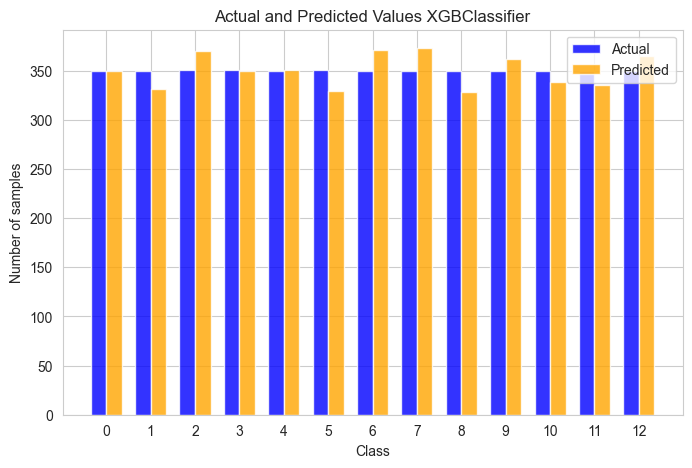

In [136]:
# Compute and plot stacked bar chart of actual and predicted values
n_classes = len(clf.classes_)
actual_values = np.zeros(n_classes)
pred_values = np.zeros(n_classes)
for i in range(n_classes):
    actual_values[i] = np.sum(val_y == i)
    pred_values[i] = np.sum(clf_predict == i)

fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_classes)
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, actual_values, bar_width,
                alpha=opacity, color='b', label='Actual')

rects2 = ax.bar(index + bar_width, pred_values, bar_width,
                alpha=opacity, color='orange', label='Predicted')

ax.set_xlabel('Class')
ax.set_ylabel('Number of samples')
ax.set_title('Actual and Predicted Values XGBClassifier')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(clf.classes_)
ax.legend()

fig.show()

In [137]:
print(classification_report(val_y, clf_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       0.93      0.88      0.91       350
           2       0.89      0.94      0.91       351
           3       0.87      0.87      0.87       351
           4       0.87      0.87      0.87       350
           5       0.91      0.85      0.88       351
           6       0.86      0.91      0.89       350
           7       0.78      0.83      0.81       350
           8       0.82      0.77      0.80       350
           9       0.93      0.96      0.95       350
          10       0.96      0.93      0.94       350
          11       0.93      0.89      0.91       350
          12       0.89      0.93      0.91       350

    accuracy                           0.90      4553
   macro avg       0.90      0.90      0.90      4553
weighted avg       0.90      0.90      0.90      4553



***ANN***

the ANN model is a very flexible deep learning model for making classifications and regressions. It can take into account complex data and noise.

In [138]:
from tensorflow.keras import layers
# Define model architecture
model_ann = tf.keras.Sequential()
model_ann.add(layers.Dense(512, input_dim=train_x_s.shape[1], activation='relu'))
model_ann.add(layers.Dense(512, activation='relu'))
model_ann.add(layers.Dropout(0.3))
model_ann.add(layers.Dense(512, activation='relu'))
model_ann.add(layers.Dense(13, activation='softmax'))

Metal device set to: Apple M1


2023-04-28 13:28:33.078359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-28 13:28:33.079608: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [139]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 13)                6669      
                                                                 
Total params: 534,541
Trainable params: 534,541
Non-trainable params: 0
_________________________________________________________________


In [140]:
# Compile model
model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [141]:
# Convert labels to one-hot encoding
train_y_h = tf.keras.utils.to_categorical(train_y)
val_y_h = tf.keras.utils.to_categorical(val_y)

In [ ]:
# Train model
history = model_ann.fit(train_x_s, train_y_h, epochs=200, batch_size=32, validation_data=(val_x_s, val_y_h))

Epoch 1/200


2023-04-28 13:28:33.378977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-28 13:28:33.667072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - ETA: 0s - loss: 1.2062 - accuracy: 0.4472

2023-04-28 13:28:40.261332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


570/570 [==============================] - 8s 13ms/step - loss: 1.2062 - accuracy: 0.4472 - val_loss: 0.9852 - val_accuracy: 0.5027
Epoch 2/200
570/570 [==============================] - 6s 11ms/step - loss: 0.9405 - accuracy: 0.4976 - val_loss: 0.9034 - val_accuracy: 0.5183
Epoch 3/200
570/570 [==============================] - 7s 12ms/step - loss: 0.8502 - accuracy: 0.5094 - val_loss: 0.8248 - val_accuracy: 0.5287
Epoch 4/200
570/570 [==============================] - 7s 11ms/step - loss: 0.8162 - accuracy: 0.5296 - val_loss: 0.7988 - val_accuracy: 0.5368
Epoch 5/200
570/570 [==============================] - 7s 12ms/step - loss: 0.7949 - accuracy: 0.5305 - val_loss: 0.8470 - val_accuracy: 0.5159
Epoch 6/200
570/570 [==============================] - 7s 12ms/step - loss: 0.7799 - accuracy: 0.5271 - val_loss: 0.7406 - val_accuracy: 0.5348
Epoch 7/200
570/570 [==============================] - 7s 12ms/step - loss: 0.7557 - accuracy: 0.5376 - val_loss: 0.7375 - val_accuracy: 0.5443
Epoc

In [ ]:
#Evaluation of train and test
train_loss, train_accuracy = model_ann.evaluate(train_x_s, train_y_h, batch_size=seed)
valid_loss, valid_accuracy = model_ann.evaluate(val_x_s, val_y_h, batch_size=seed)

#Print score
print("Train Loss : {:.4f}".format(train_loss))
print("Train Accuracy : {:.4f} %".format(train_accuracy * 100))
print("Valid Loss : {:.4f}".format(valid_loss))
print("Valid Accuracy : {:.4f} %".format(valid_accuracy * 100))



#Plot
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()

### PREDICT TO NEXT CLASS

***LSTM***

Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections.

<img src="Plot/LSTM_Cell.svg.png" alt="LSTM" style="width: 60%; height: auto;">

In [ ]:
#Create model
model = Sequential()
model.add(LSTM(128, input_shape=(n_input, n_features), return_sequences=True))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(64, activation='relu'))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
#Summary of the model
model.summary()

<p>The Adam optimization algorithm is used for the formation of deep learning models. This is an extension of the stochastic gradient descent. In this optimization algorithm, the current averages of gradients and second moments of gradients are used. It is used to calculate adaptive learning rates for each parameter.</p>
<p>The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster</p>

In [ ]:
#Compile the model
opt_rms=RMSprop(lr=0.005)
learning_rate = 0.001
opt_adam = Adam(lr=learning_rate)
model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the data split
history = model.fit(train_generator, epochs=100, verbose=1,validation_data=valid_generator, class_weight=weights)

In [ ]:
#Evaluation of train and test
train_loss, train_accuracy = model.evaluate(train_generator, batch_size=batch_size)
test_loss, test_accuracy = model.evaluate(valid_generator, batch_size=batch_size)

#Print the Accuracy
print("Score of the train (loss) : {:.4f}".format(train_loss))
print("Accuracy of the train (accuracy) : {:.4f} %".format(train_accuracy*100))
print("Score of the test (loss) : {:.4f}".format(test_loss))
print("Accuracy of the test (accuracy) : {:.4f} %".format(test_accuracy*100))

This code allows you to select the last n_input lines of the DataFrame data_final, where n_input is the number of time steps to use for the prediction. Then, it converts the selected data into a numpy array, then reshapes it into a 3D array with a shape (1, n_input, n_features), where the first element 1 is the number of sequences in the batch (we have only one sequence), n_input is the number of time steps in the sequence, and n_features is the number of variables This prepares the data to be entered into the prediction model.

In [ ]:
# Select last three rows from data_final
last_sequence = data_final[-n_input:]

# Convert last_sequence to a numpy array
last_sequence = last_sequence.to_numpy()

# Reshape last_sequence to a 3D array
last_sequence = last_sequence.reshape((1, n_input, n_features))

This is to predict the next state

In [ ]:
#Predict next state
model.predict(last_sequence)

The result of `model.predict(last_sequence` is a prediction for each possible class. The output is a size matrix (1, number of classes) with probabilities for each class.

In [ ]:
predict_state = model.predict(last_sequence)
#Value
value = np.argmax(predict_state)

for key, val in type_dict.items():
    if val == value:
        print("The state predict is in 10min is {} and his class is {}".format(key,np.argmax(predict_state)))

In [ ]:
# Predict
train_predict = model.predict(train_generator)
valid_predict = model.predict(valid_generator)

In [ ]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()

In [ ]:
# Convert predicted classes
train_pred_classes = np.argmax(train_predict, axis=1)
valid_pred_classes = np.argmax(valid_predict, axis=1)
y_train_classes = np.argmax(y_train, axis=1)
y_valid_classes = np.argmax(y_valid, axis=1)

#Let'us print classification report
print('Classification Report (Train):\n', classification_report(y_train_classes[n_input:], train_pred_classes))
print('Classification Report (Validation):\n', classification_report(y_valid_classes[n_input:], valid_pred_classes))

In [ ]:
#Install  Keras Tuner
!pip install -U keras-tuner

In [ ]:
import kerastuner as kt

**Detection of anomalies**

Forest isolation is an anomaly machine learning algorithm that detects anomalies in a data set by isolating data points in a random decision tree. It is based on the idea that anomalies are rare data points and different from the rest of the data, and therefore they are more likely to be isolated more quickly in the decision tree.

In [ ]:
from sklearn.ensemble import IsolationForest

The algorithm works by creating multiple random decision trees and using the depth to which each data point is isolated in the tree as a measure of anomaly. Data points that are isolated earlier are considered more abnormal than those that are isolated later.

In [ ]:
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    
    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )
    
    IF.fit(model_data)
    
    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    
    score = IF.decision_function(model_data)
    
    return output, score

The function then creates an instance of the Isolation Forest algorithm with the given parameters, trains the model with the input data, predicts anomalies in the data, and returns a binary vector of the same size as model_data where 1 represents an observation considered to be an anomaly by the model and 0 otherwise. The function also returns a decision score for each observation in model_data, which is a measure of each observation's distance from the Isolation Forest decision boundary.

In [ ]:
outliers, score = run_isolation_forest(data_final)

In [ ]:
anomaly = outliers.values

In [ ]:
data_final['outliers'] = anomaly
data_final['score'] = score

In [ ]:
data_final['outliers'].value_counts()

We have detected nearly 49 anomalies in the datasets.

Let's detect anomaly on the whole dataset.

In [ ]:
data_final.shape

In [ ]:
outliers_data, score_data = run_isolation_forest(df_pi_without_type)

In [ ]:
outliers_data.value_counts()

We also detect here 49 anomalies. This means that we have selected our features well and that too.

In [ ]:
sns.countplot(x='type_code', hue='outliers', data=data_final, palette='rocket')
plt.show()

In [ ]:
plt.title('Obervations of anomaly')
plt.figure(figsize=(10,8))
plt.plot(data_final['score'])
# add a horizontal line at y=0.5
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [ ]:
data_final[data_final['outliers']==1].head()

In [ ]:
sns.countplot(x='outliers', hue='predictions', data=data_final, palette='rocket')

In [ ]:
data_final.groupby(['predictions', 'outliers']).describe()

In [ ]:
x=22/4905
y=27/4716

In [ ]:
print(' ratio to have an anomaly in the class 0 = {}% , \n ratio to have an anomaly in the class 1 = {}%'.format(x*100,y*100))

It is wiser to monitor the 2 groups to identify anomalies but class 1 is more suspicious than the second.

In [ ]:
outliers_data=data_final[data_final['outliers']==1]

In [ ]:
#Copy our data for futur operations
data_anomaly = data_final.copy()

In [ ]:
data_anomaly['predictions'][data_anomaly['outliers'] == 0] = 0
data_anomaly['predictions'][data_anomaly['outliers'] == 1] = 1

#Matrix of data
heatmap_data = pd.pivot_table(data_anomaly, values='predictions', index=data_anomaly.index.hour, columns=data_anomaly.index.date, aggfunc=np.max)

We will divide the dataset to make a classification on the results obtained by the isolation forest

In [ ]:
#Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Reds', cbar_kws={'label': 'predictions'})

#Plot axvline
for i in range(1,7):
    ax.axvline(x=i, color='black', linestyle='--')

ax.set_title('Card of anomaly where where outliers = 1')
ax.set_xlabel('Date')
ax.set_ylabel('Hour')
plt.show()

In summary, the graph shows the hourly anomaly predictions for each day of the week from Monday to Saturday, represented by darker colors in the heatmap. The dotted vertical lines serve to separate the days.

In [ ]:
# Calculate sum of lines
heatmap_data['sum'] = heatmap_data.sum(axis=1)

#Sorted DESC
heatmap_data_sorted = heatmap_data.sort_values('sum', ascending=False)

#print the 5 days with most anomaly
print("The hours most exposed to anomalies are")
print(heatmap_data_sorted.index[:5])

In [ ]:
heatmap_data_sorted.head()

We notice here a certain interval between the days of 3 days to obtain an anomaly so we can deduce from it after the equipment is initiated in the network. 

2 hours later we find ourselves with an anomaly then the network behaves correctly then at 10 am we still have a problem. End everything is clear in the previous table.

In [ ]:
#Split the data
A = data_anomaly.drop('outliers', axis=1)
B = data_anomaly['outliers']

a, b, c, d = train_test_split(A, B, test_size=0.2, random_state=seed, stratify=B)

In [ ]:
# Initialize scaler object
scaler = RobustScaler()

# Fit and transform the training data
a_scaled = scaler.fit_transform(a)

# Transform the validation/test data using the same scaler
b_scaled = scaler.transform(b)

In [ ]:
# Initialize the XGBClassifier
clf_anomaly = XGBClassifier(n_estimators=200,class_weight=weights, scale_pos_weight=9,
    max_depth=5,
    learning_rate=0.05,
    min_child_weight=2,)

# Fit the classifier to the training data
clf_anomaly.fit(a_scaled, c)

In [ ]:
#Use the classifier to make predictions on the test data
y_pred = clf_anomaly.predict(b_scaled)

In [ ]:
# Print the classification report
print(classification_report(d, y_pred))

In [ ]:
#Accuracy
accuracy = accuracy_score(d, y_pred)
print("Accuracy of the xgboost model to classify anomaly:", accuracy)

This XGB model classifies the predictions of the anomalies obtained.

# <font size=6 id='evaluation'>**EVALUATION**</font>

This step consists of evaluating the accuracy of the models and selecting the most appropriate model.

Import the new data and prepare it to test it in the model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate clf model
y_pred_clf = clf.predict(val_x_s)
accuracy_clf = accuracy_score(val_y, y_pred_clf)
precision_clf = precision_score(val_y, y_pred_clf, average='macro')
recall_clf = recall_score(val_y, y_pred_clf, average='macro')
f1_clf = f1_score(val_y, y_pred_clf, average='macro')
roc_auc_clf = roc_auc_score(val_y, clf.predict_proba(val_x_s), multi_class='ovo')

# Evaluate kon model
y_pred_knn = knn.predict(val_x_s)
accuracy_knn = accuracy_score(val_y, y_pred_knn)
precision_knn = precision_score(val_y, y_pred_knn, average='macro')
recall_knn = recall_score(val_y, y_pred_knn, average='macro')
f1_knn = f1_score(val_y, y_pred_knn, average='macro')
roc_auc_knn = roc_auc_score(val_y, knn.predict_proba(val_x_s), multi_class='ovo')

# Evaluate rfc model
y_pred_rfc = rfc.predict(val_x_s)
accuracy_rfc = accuracy_score(val_y, y_pred_rfc)
precision_rfc = precision_score(val_y, y_pred_rfc, average='macro')
recall_rfc = recall_score(val_y, y_pred_rfc, average='macro')
f1_rfc = f1_score(val_y, y_pred_rfc, average='macro')
roc_auc_rfc = roc_auc_score(val_y, rfc.predict_proba(val_x_s), multi_class='ovo')

# Print evaluation results
print("XGBClassifier model:")
print("Accuracy:", accuracy_clf)
print("Precision:", precision_clf)
print("Recall:", recall_clf)
print("F1 score:", f1_clf)
print("ROC AUC:", roc_auc_clf)
print('='*30)

print("\nKNN model:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 score:", f1_knn)
print("ROC AUC:", roc_auc_knn)
print('='*30)

print("\nRandomForest model:")
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1 score:", f1_rfc)
print("ROC AUC:", roc_auc_rfc)

Based on the evaluation metrics, the XGBClassifier model has the highest accuracy, precision, recall, F1 score, and ROC AUC among the three models, with accuracy of 0.8946, precision of 0.8953, recall of 0.8946, F1 score of 0.8945, and ROC AUC of 0.9937. The KNN model has the lowest accuracy, precision, and F1 score among the three models, with accuracy of 0.8550, precision of 0.8745, recall of 0.8550, F1 score of 0.8517, and ROC AUC of 0.9713.

The RandomForest model has relatively high performance, with accuracy of 0.8867, precision of 0.8868, recall of 0.8867, F1 score of 0.8866, and ROC AUC of 0.9916.

Overall, the XGBClassifier model appears to have the best performance, followed by the RandomForest model, while the KNN model appears to be the least performing model among the three.

In [ ]:
importances = rfc.feature_importances_
feature_names = train_x.columns
df_rfc = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [ ]:
importances = clf.feature_importances_
feature_names = train_x.columns
df_clf = pd.DataFrame({'feature': feature_names, 'importance': importances})

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Features with most importances for RFC')
sns.barplot(x='feature', y='importance', data=df_rfc)

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Features with most importances for XGBClassifier')
sns.barplot(x='feature', y='importance', data=df_clf)

In [ ]:
pd.DataFrame(rfc.feature_importances_,index=train_x.columns)

Based on the feature importances listed, it appears that received_keepalives is the most important feature, followed by sent_keepalives and sent_explicit_withdraw. This means that these features have a higher impact on the output of the model compared to the other features.

The feature local_port has a relatively low importance score of 0.058103, indicating that it has less impact on the output of the model compared to the other features. Similarly, the feature foreign_port also has a low importance score of 0.053429, indicating that it has the least impact on the output of the model.

Overall, based on these feature importances, it can be concluded that received_keepalives, sent_keepalives, and ent_explicit_withdraw are the most important features to consider when predicting the output of the model, while local_port and foreign_port may be less important or irrelevant features for the prediction.

In [ ]:
pd.DataFrame(clf.feature_importances_,index=train_x.columns)

Based on the feature importances listed, it appears that sent_explicit_withdraw is the most important feature, with an importance score of 0.456196. This means that this feature has the highest impact on the output of the model compared to the other features.

The feature local_port also has a relatively high importance score of 0.312657, indicating that it has a significant impact on the output of the model.

The feature received_keepalives has a relatively low importance score of 0.106510, while sent_keepalives and foreign_port have even lower scores of 0.054810 and 0.069827 respectively. This suggests that these features have less impact on the output of the model compared to sent_explicit_withdraw and local_port.

Overall, based on these feature importances, it can be concluded that sent_explicit_withdraw and local_port are the most important features to consider when predicting the output of the model, while received_keepalives, sent_keepalives, and foreign_port may have less impact on the prediction.

In [ ]:
from sklearn.preprocessing import label_binarize

In [ ]:
# Encoder les données de validation
val_y_bin = label_binarize(val_y, classes=np.unique(val_y))

In [ ]:
clf_probs = clf.predict_proba(val_x_s)
#rfc_probs = rfc.predict_proba(val_x_s)
#knn_probs = knn.predict_proba(val_x_s)

In [ ]:
classes=np.unique(val_y)

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
clf_fpr = {}
clf_tpr = {}
clf_thresholds = {}
roc_auc = dict()
n_classes = len(classes)

plt.figure(figsize=(15,12))


for i in range(n_classes):
    clf_fpr[i], clf_tpr[i], clf_thresholds[i] = roc_curve(val_y_bin[:,i], clf_probs[:,i])
    roc_auc[i]=auc(clf_fpr[i],clf_tpr[i])
    
    #plotting
    plt.plot(clf_fpr[i], clf_tpr[i], linestyle='--', linewidth=2, label='%s vs Rest(AUC=%0.2f)'%(classes[i], roc_auc[i]))



plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclasses ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.plot()

The Receiver Operating Characteristic Area Under the Curve (ROC AUC) metric is a measure of the binary classification quality of a classification model. It assesses the model's ability to correctly classify the test data by calculating the area under the ROC curve. The ROC curve is a plot of true positive rate (TPR) versus false positive rate (FPR) for all possible classification threshold values.

The ROC AUC metric is often used in binary classification problems to assess the quality of the classification model. It is very useful for comparing several classification models and choosing the one with the best performance.

However, it is also possible to use the ROC AUC metric in multi-class classification problems using a "one-vs-all" approach. In this approach, each class is compared to all other classes to calculate the area under the ROC curve for each class. The results for each class can then be aggregated using an averaging method, such as macro average or weighted average based on the number of examples per class. This approach allows to evaluate the overall performance of the model for multi-class classification using the ROC AUC metric.